#please mount your drive


In [ ]:
!git clone https://github.com/XLR8-07/FracAtlas.git
!pip install nibabel

Cloning into 'FracAtlas'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 113 (delta 29), reused 41 (delta 14), pack-reused 47
Receiving objects: 100% (113/113), 44.95 MiB | 11.63 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
!unzip /'content/drive/MyDrive/bayena/FracAtlas.zip' -d '/content/seg/' > /dev/null


In [ ]:
!tar -xvf "/content/drive/MyDrive/bayena/full_res_images_masks.tar" > /dev/null

In [1]:
# creating the folder paths need for MSD format
import os
os.makedirs('./content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/imagesTr')
os.makedirs('./content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/imagesTs')
os.makedirs('./content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/labelsTr')
# /content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles created!
# /content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/imagesTr created!
# /content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/labelsTr created!
# /content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/imagesTs

In [ ]:
##Data preparetion
import pandas as pd
import cv2
import numpy as np
import nibabel as nib

# data_csv = pd.read_csv('/content/seg/FracAtlas/Utilities/Fracture Split/train.csv') we skip the split as it only split 700 and we need 1500.
image_names = os.listdir('/content/seg/FracAtlas/images/Fractured')
print(len(image_names))

images_folder_path = './content/image_masks/images'
masks_folder_path =   './content/image_masks/masks'
image_size = 224


#Read and resize the images to 224
# for img_id in data_csv['image_id']:
for img_id in image_names:

  img = cv2.imread(images_folder_path +'/'+ img_id )
  img = cv2.resize(img, dsize=(image_size, image_size))

  mask_labels = cv2.imread(masks_folder_path +'/'+ img_id )
  mask_labels = cv2.resize(mask_labels, dsize=(image_size, image_size))

# Converting to nii.gz
  affine = np.eye(4)
  img_converted_array = np.array(img, dtype=np.float32) # You need to replace normal array by yours
  mask_labels_converted_array = np.array(mask_labels, dtype=np.float32) # You need to replace normal array by yours

  img_nifti = nib.Nifti1Image(img_converted_array, affine)
  mask_labels_nifti = nib.Nifti1Image(mask_labels_converted_array, affine)

#savin the image and the mask in nii.gz format

  nib.save(img_nifti,'/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/imagesTr/FRAC_' + img_id[6:10]+'_0000.nii.gz') # Here you put the path + the extionsion 'nii' or 'nii.gz'
  nib.save(mask_labels_nifti,'/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/labelsTr/FRAC_' + img_id[6:10]+'.nii.gz') # Here you put the path + the extionsion 'nii' or 'nii.gz'





717


In [ ]:
##Data preparetion
import pandas as pd
import cv2
import numpy as np
import nibabel as nib

# data_csv = pd.read_csv('/content/seg/FracAtlas/Utilities/Fracture Split/train.csv') we skip the split as it only split 700 and we need 1500.
image_names = os.listdir('/content/seg/FracAtlas/images/Non_fractured')[:800]
print(len(image_names))
images_folder_path = './content/image_masks/images'
masks_folder_path =   './content/image_masks/masks'
image_size = 224



#Read and resize the images to 224
# for img_id in data_csv['image_id']:
for img_id in image_names:

  img = cv2.imread(images_folder_path +'/'+ img_id )
  img = cv2.resize(img, dsize=(image_size, image_size))

  mask_labels = cv2.imread(masks_folder_path +'/'+ img_id )
  mask_labels = cv2.resize(mask_labels, dsize=(image_size, image_size))

# Converting to nii.gz
  affine = np.eye(4)
  img_converted_array = np.array(img, dtype=np.float32) # You need to replace normal array by yours
  mask_labels_converted_array = np.array(mask_labels, dtype=np.float32) # You need to replace normal array by yours

  img_nifti = nib.Nifti1Image(img_converted_array, affine)
  mask_labels_nifti = nib.Nifti1Image(mask_labels_converted_array, affine)

#savin the image and the mask in nii.gz format

  nib.save(img_nifti,'/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/imagesTr/FRAC_' + img_id[6:10]+'_0000.nii.gz') # Here you put the path + the extionsion 'nii' or 'nii.gz'
  nib.save(mask_labels_nifti,'/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/labelsTr/FRAC_' + img_id[6:10]+'.nii.gz') # Here you put the path + the extionsion 'nii' or 'nii.gz'





800


In [ ]:
#Creating the dataset.json file necessary for nn-unet
from collections import OrderedDict
import json


task_folder_name = '/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles'
train_label_dir = '/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/labelsTr'
dataset_name = 'Dataset100_FracAtles'



overwrite_json_file = True #make it True if you want to overwrite the dataset.json file in Dataset_folder
json_file_exist = False

if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
    print('dataset.json already exist!')
    json_file_exist = True

if json_file_exist==False or overwrite_json_file:

    json_dict = OrderedDict()
    json_dict['name'] = dataset_name
    json_dict['description'] = "FracAtlas: A Dataset for Fracture Classification, Localization and Segmentation of Musculoskeletal Radiographs"
    json_dict['tensorImageSize'] = "3D"
    json_dict['reference'] = "contact: zecoabdo16@gmail.com"
    json_dict['licence'] = "contact: zecoabdo16@gmail.com"
    json_dict['release'] = "0.0"

    #you may mention more than one modality
    json_dict['channel_names'] = {
        "0": "CT"
    }

    # set expected file ending
    json_dict["file_ending"] = ".nii.gz"

    #label names should be mentioned for all the labels in the dataset
    json_dict['labels'] = {
        "background": 0,
        "Fracture": 1,
        "2nd_Fracture": 2,
    }

    train_ids = os.listdir(train_label_dir)
    # test_ids = os.listdir(test_dir)
    json_dict['numTraining'] = len(train_ids)
    # json_dict['numTest'] = len(test_ids)


    with open(os.path.join(task_folder_name,"dataset.json"), 'w') as f:
        json.dump(json_dict, f, indent=4, sort_keys=True)

    if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
        if json_file_exist==False:
            print('dataset.json created!')
        else:
            print('dataset.json overwritten!')

dataset.json already exist!
dataset.json overwritten!


In [2]:
# Import basic packages for later use
import os
import shutil
from collections import OrderedDict

import json
import matplotlib.pyplot as plt
import nibabel as nib

import numpy as np
import torch

In [3]:
assert torch.cuda.is_available() # if there is an error here, enable GPU in the Runtime

In [4]:
# install nnunet - yes it is that easy
!pip install nnunetv2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.6/178.6 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 105.5 MB/s eta 0:00:00
  Created wheel

In [5]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.3 MB/s eta 0:00:00


In [6]:
import wandb
wandb.init(project="bayena_task")
#  5db1d7e350565d7bff6d94eef3e83bee4d3cd460


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [7]:
!pip install gdown

In [8]:
# mount your drive
from google.colab import drive
# drive.mount('/content/drive',force_remount = True)

drive_dir = "/content/drive/MyDrive"
mount_dir = os.path.join(drive_dir, "Colab Notebooks")
base_dir = os.getcwd()

Mounted at /content/drive


In [9]:
assert os.path.exists(drive_dir) # if this fails, something went wrong with mounting GoogleDrive
if os.path.exists(mount_dir) is False:
    os.makedirs(mount_dir)

In [10]:
def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input:
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder
    """
    if os.path.exists(folder_path):

        if not overwrite:
            print(f"{folder_path} exists.")
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

In [11]:
# Maybe move path of preprocessed data directly on content - this may be signifcantely faster!
print("Current Working Directory {}".format(os.getcwd()))
path_dict = {
    "nnUNet_raw" : os.path.join(mount_dir, "nnUNet_raw"),
    "nnUNet_preprocessed" : os.path.join(mount_dir, "nnUNet_preprocessed"), # 1 experiment: 1 epoch took 112s
    "nnUNet_results" : os.path.join(mount_dir, "nnUNet_results"),
    "RAW_DATA_PATH" : os.path.join(mount_dir, "RawData"), # This is used here only for convenience (not necessary for nnU-Net)!
}

# Write paths to environment variables
for env_var, path in path_dict.items():
  os.environ[env_var] = path

# Check whether all environment variables are set correct!
for env_var, path in path_dict.items():
  if os.getenv(env_var) != path:
    print("Error:")
    print("Environment Variable {} is not set correctly!".format(env_var))
    print("Should be {}".format(path))
    print("Variable is {}".format(os.getenv(env_var)))
  make_if_dont_exist(path, overwrite=False)

print("If No Error Occured Continue Forward. =)")

Current Working Directory /content
/content/drive/MyDrive/Colab Notebooks/nnUNet_raw exists.
/content/drive/MyDrive/Colab Notebooks/nnUNet_preprocessed exists.
/content/drive/MyDrive/Colab Notebooks/nnUNet_results exists.
/content/drive/MyDrive/Colab Notebooks/RawData exists.
If No Error Occured Continue Forward. =)


In [12]:
dataset_name = 'Dataset100_FracAtles' #change here for different dataset name
nnunet_raw_data = os.path.join(os.getenv("nnUNet_raw"))
task_folder_name = os.path.join(nnunet_raw_data,dataset_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')

# Create Folder Structure for the SCGM dataset on the system
make_if_dont_exist(task_folder_name)
make_if_dont_exist(train_image_dir)
make_if_dont_exist(train_label_dir)
make_if_dont_exist(test_dir)


/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles exists.
/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/imagesTr exists.
/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/labelsTr exists.
/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/imagesTs exists.


In [24]:
train_files = os.listdir(train_image_dir)
label_files = os.listdir(train_label_dir)
print("train image files:",len(train_files))
print("train label files:",len(label_files))
# print("Matches:",len(set(train_files).intersection(set(label_files))))

# assert len(set(train_files).intersection(set(label_files))) == 574  #should be equal to 160 for SCGM Challenge

train image files: 1517
train label files: 1517


In [ ]:
!nnUNetv2_plan_and_preprocess -d 100 -np 1 -c 3d_fullres --verify_dataset_integrity

Fingerprint extraction...
Dataset100_FracAtles
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Experiment planning...
2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 65, 'patch_size': array([224, 224]), 'median_image_size_in_voxels': array([224., 224.]), 'spacing': array([1., 1.]), 'normalization_schemes': ['CTNormalization'], 'use_mask_for_norm': [False], 'UNet_class_name': 'PlainConvUNet', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': (2, 2, 2, 2, 2, 2), 'n_conv_per_stage_decoder': (2, 2, 2, 2, 2), 'num_pool_per_axis': [5, 5], 'pool_op_kernel_sizes': [[1, 1], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], 'conv_kernel_sizes': [[3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3]], 'unet_max_num_features': 512, 'resampling_fn_dat

(224, 224, 3) (224, 224, 3)


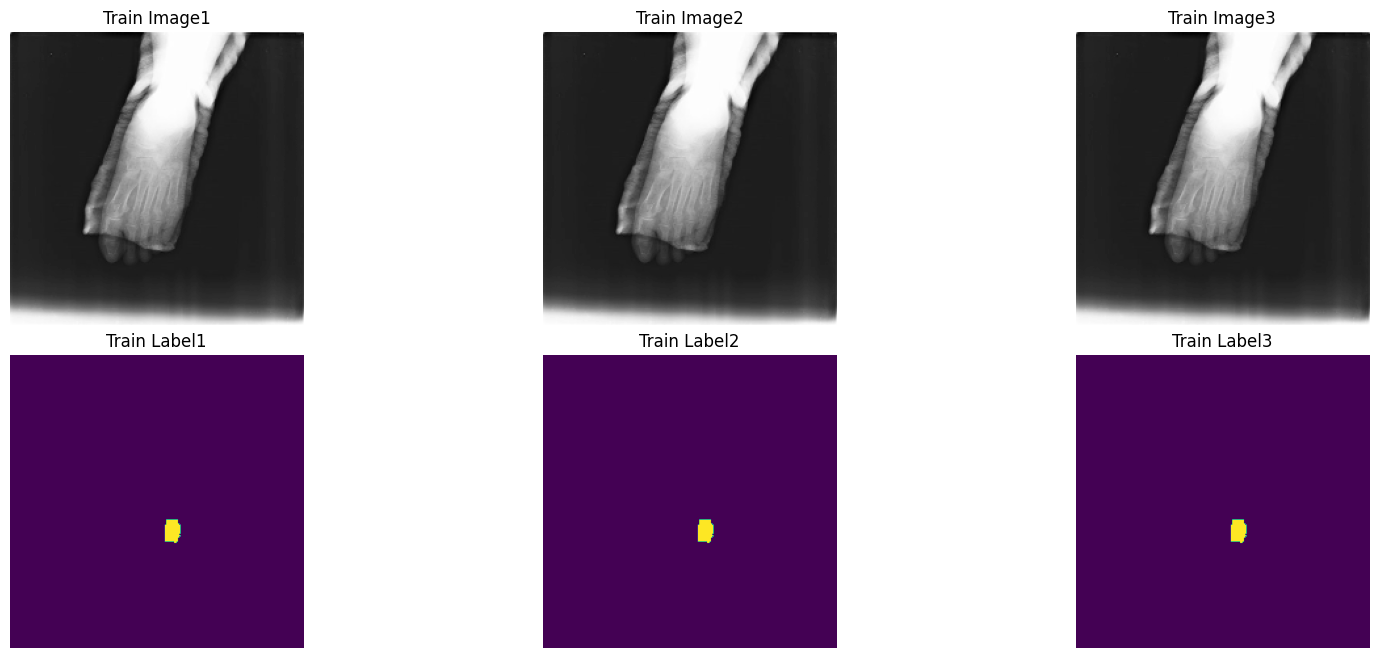

In [21]:
#visualizing some of the training images and labels
# (re-run to see random pick-ups)
# only maximum of first 5 slices are plotted
train_img_name = os.listdir(train_image_dir)[np.random.randint(0,574)]
train_img = np.array(nib.load(os.path.join(train_image_dir,train_img_name)).dataobj)[:,:,:5]
train_label_name = train_img_name[:train_img_name.find('_0000.nii.gz')]+'.nii.gz'
train_label = np.array(nib.load(os.path.join(train_label_dir,train_label_name)).dataobj)[:,:,:5]

print(train_img.shape,train_label.shape)

max_rows = 2
max_cols = train_img.shape[2]

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off")
    axes[0, idx].set_title('Train Image'+str(idx+1))
    axes[0 ,idx].imshow(train_img[:,:,idx], cmap="gray")
for idx in range(max_cols):
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Train Label'+str(idx+1))
    axes[1, idx].imshow(train_label[:,:,idx])

plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

In [ ]:
!nnUNetv2_train 100 3d_fullres 4 -tr nnUNetTrainer_10epochs  --c   #the epoch calling parameter is the weirdest lol !
# https://github.com/MIC-DKFZ/nnUNet/blob/master/nnunetv2/training/nnUNetTrainer/variants/training_length/nnUNetTrainer_Xepochs.py
# pick the class name suitable for your training epochs.

In [ ]:
# from google.colab import runtime
# runtime.unassign()

In [14]:
!nnUNetv2_predict -i '/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset100_FracAtles/imagesTr' -o /content/MSD/Dataset100_FracAtles/imagesTs -d 100 -c 3d_fullres -tr nnUNetTrainer_10epochs
#  The first path is the folder which contains the images with nii.gz foramt , the 2nd is the output folder , -d 3d_fullres is the configration , -tr the model name used in training

Streaming output truncated to the last 5000 lines.
100% 1/1 [00:00<00:00, 13.39it/s]
100% 1/1 [00:00<00:00, 16.04it/s]
100% 1/1 [00:00<00:00, 15.13it/s]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done with FRAC_2846

Predicting FRAC_2847:
perform_everything_on_gpu: True
100% 1/1 [00:00<00:00, 15.45it/s]
100% 1/1 [00:00<00:00, 14.51it/s]
100% 1/1 [00:00<00:00, 14.98it/s]
100% 1/1 [00:00<00:00, 15.75it/s]
100% 1/1 [00:00<00:00, 15.63it/s]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done with FRAC_2847

Predicting FRAC_2848:
perform_everything_on_gpu: True
100% 1/1 [00:00<00:00, 14.04it/s]
100% 1/1 [00:00<00:00, 15.43it/s]
100% 1/1 [00:00<00:00, 16.16it/s]
100% 1/1 [00:00<00:00, 15.18it/s]
100% 1/1 [00:00<00:00, 15.22it/s]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done w

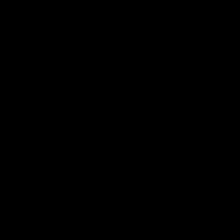

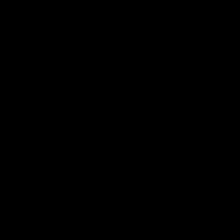

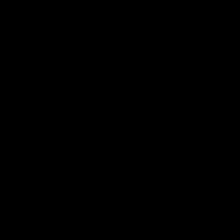

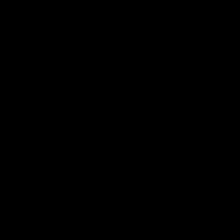

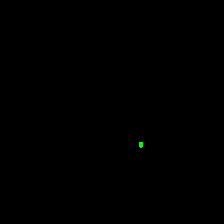

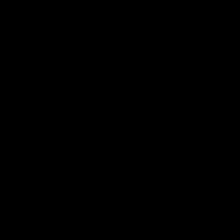

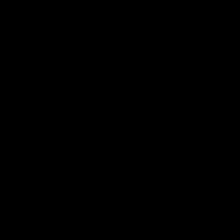

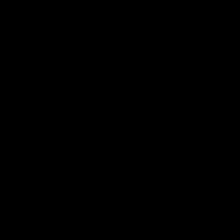

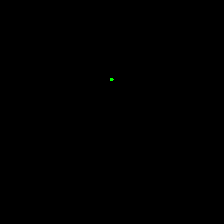

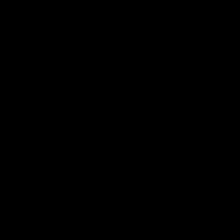

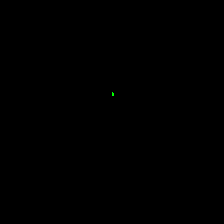

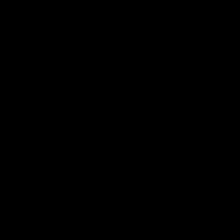

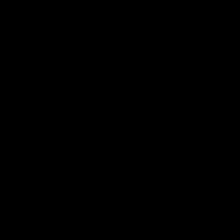

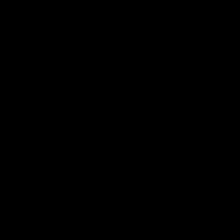

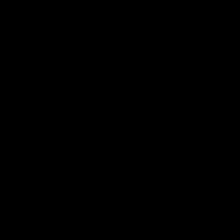

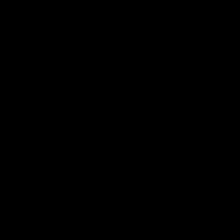

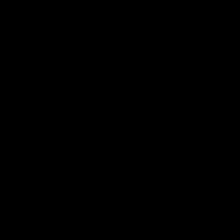

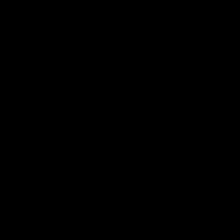

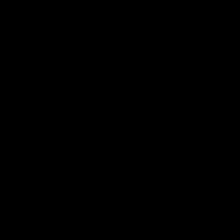

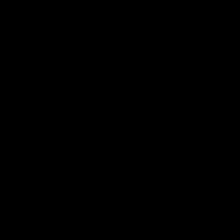

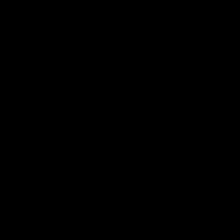

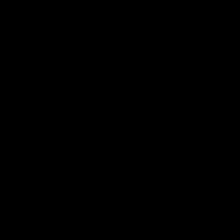

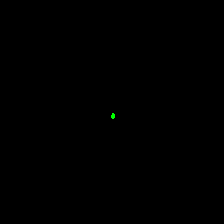

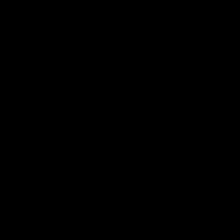

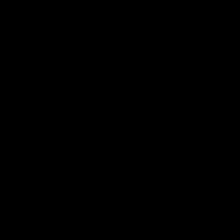

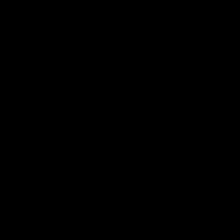

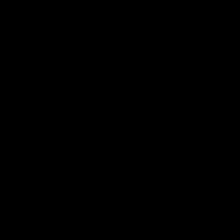

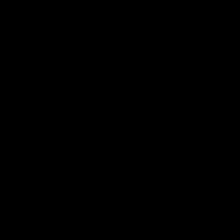

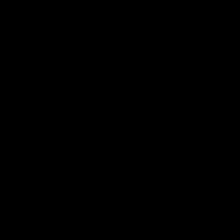

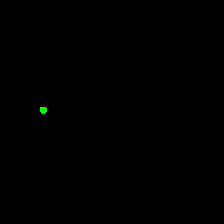

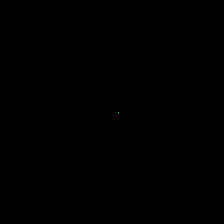

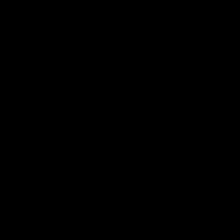

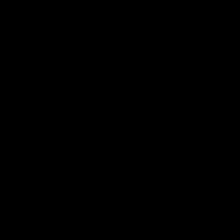

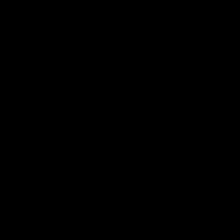

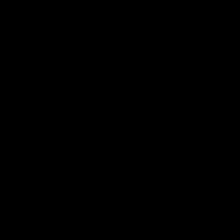

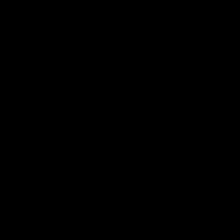

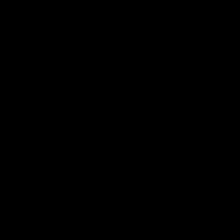

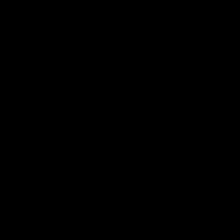

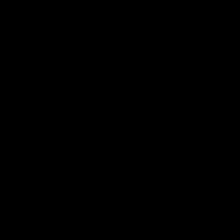

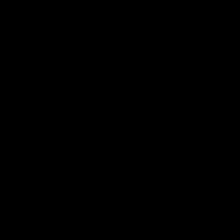

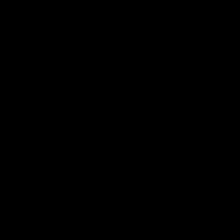

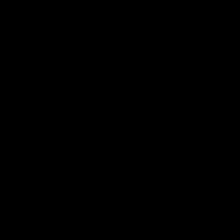

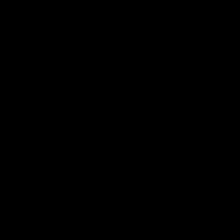

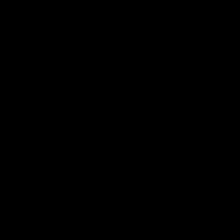

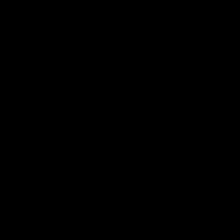

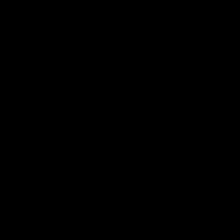

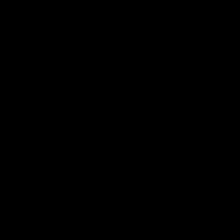

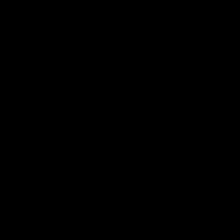

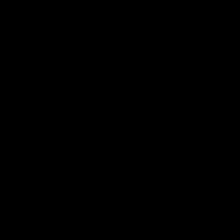

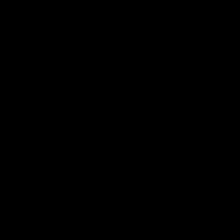

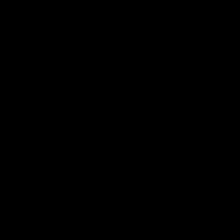

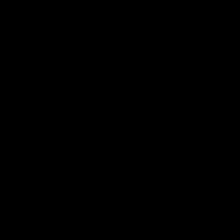

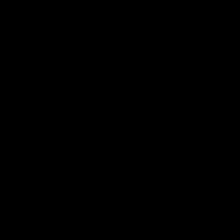

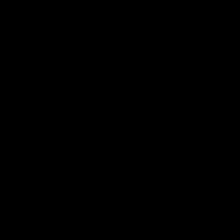

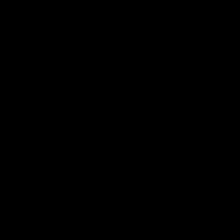

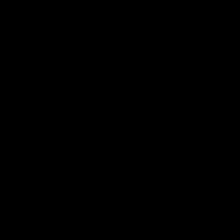

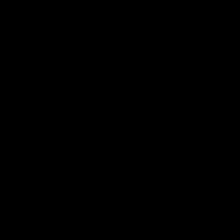

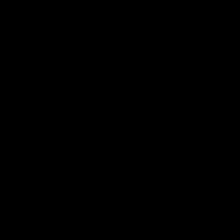

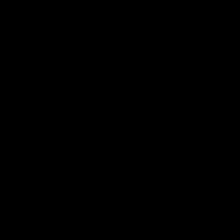

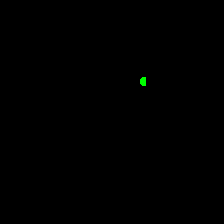

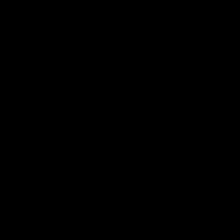

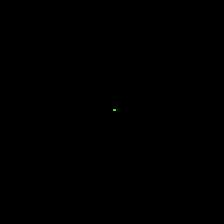

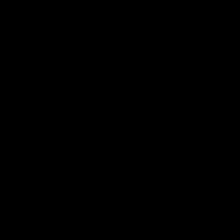

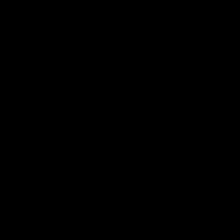

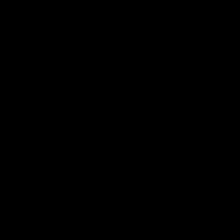

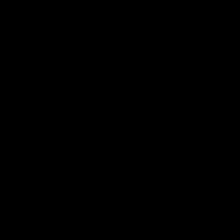

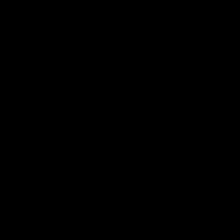

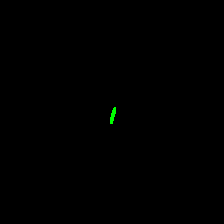

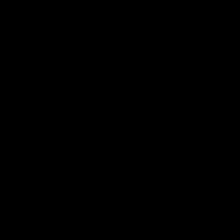

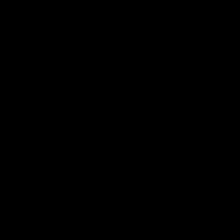

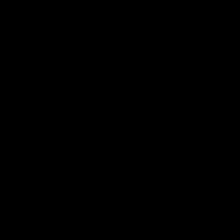

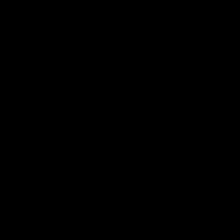

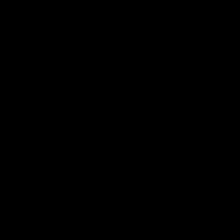

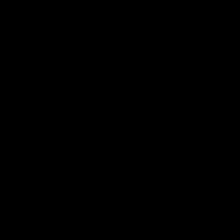

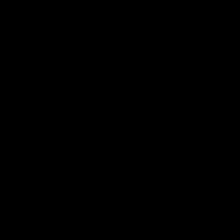

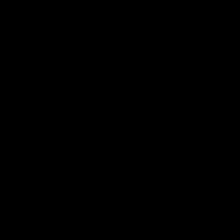

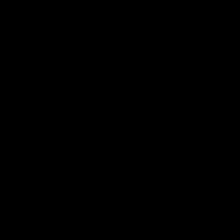

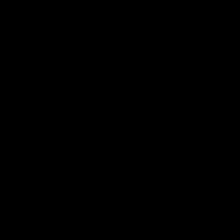

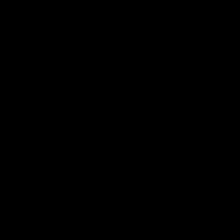

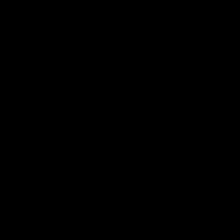

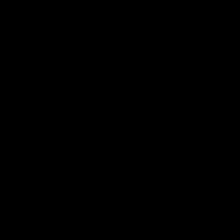

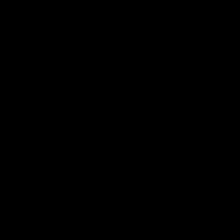

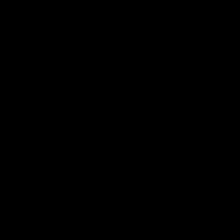

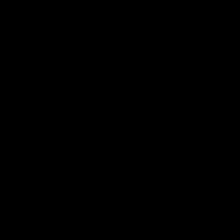

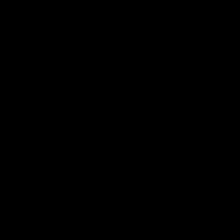

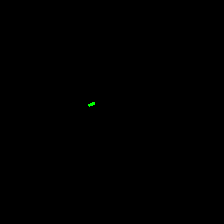

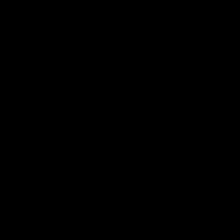

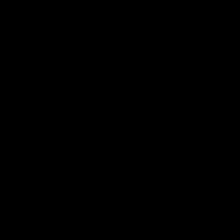

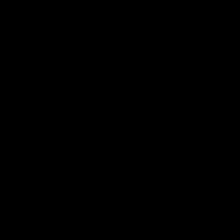

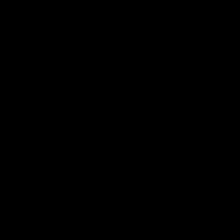

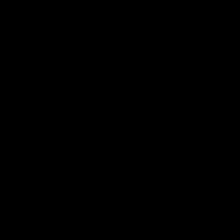

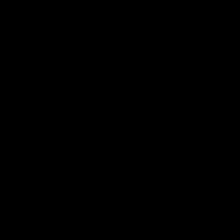

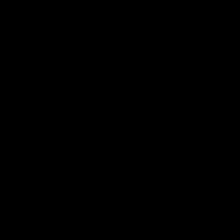

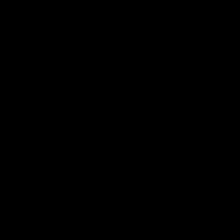

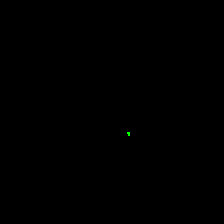

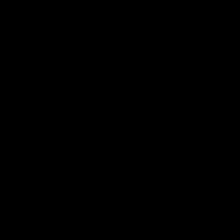

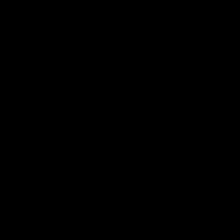

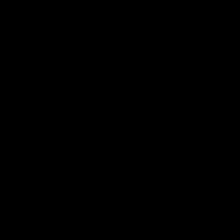

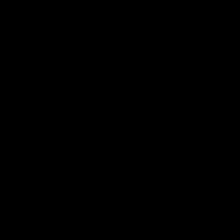

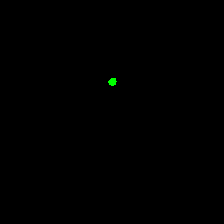

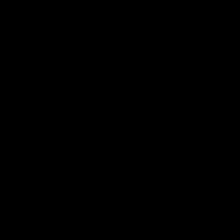

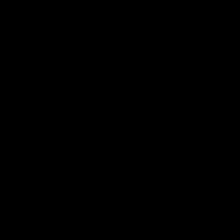

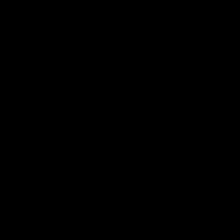

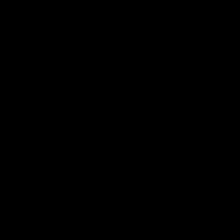

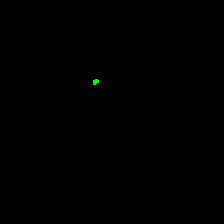

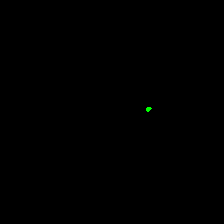

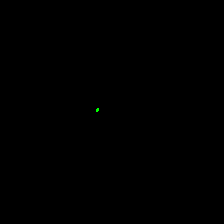

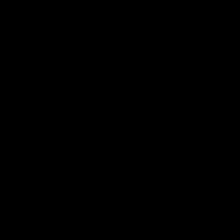

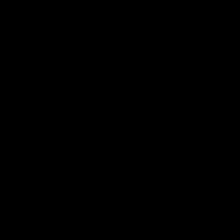

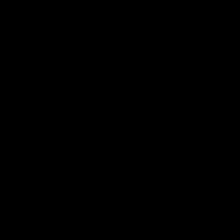

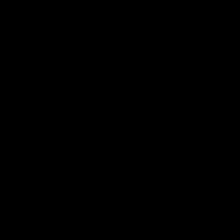

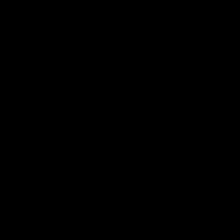

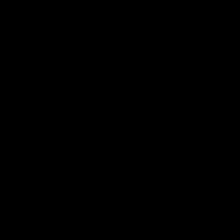

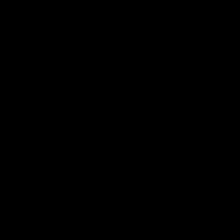

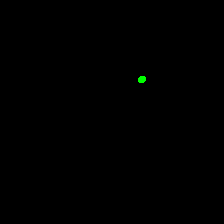

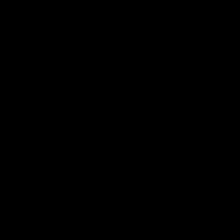

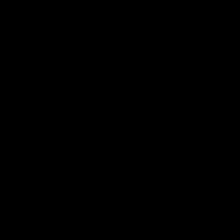

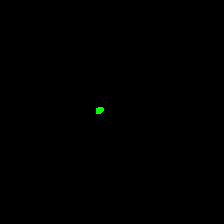

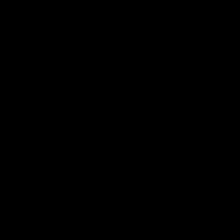

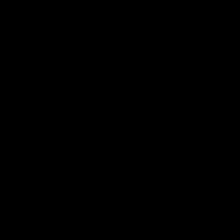

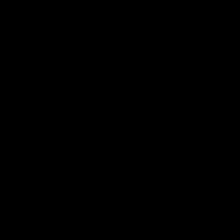

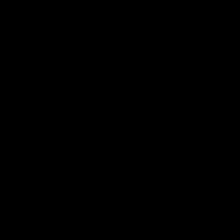

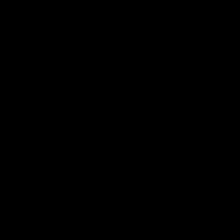

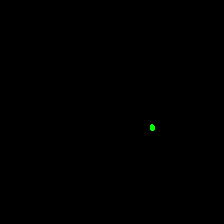

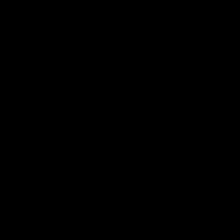

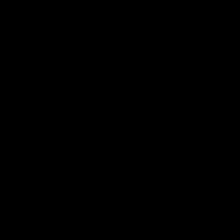

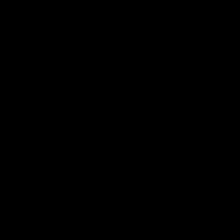

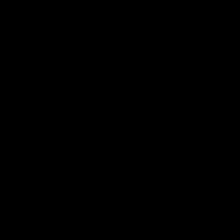

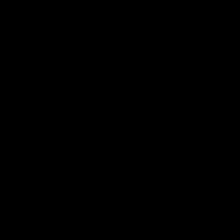

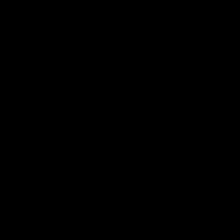

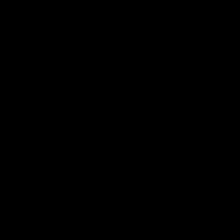

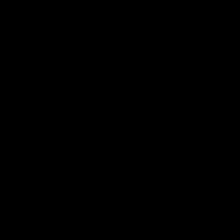

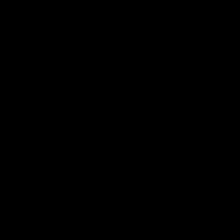

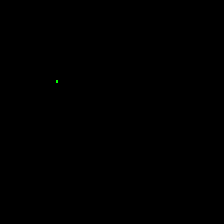

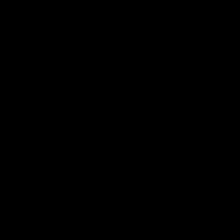

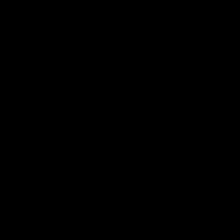

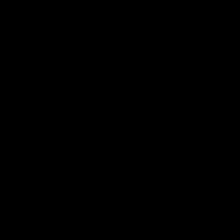

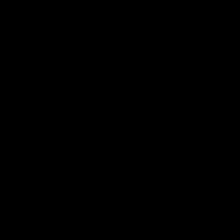

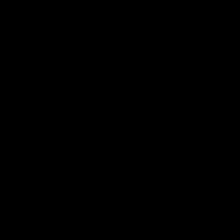

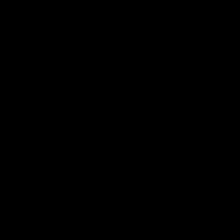

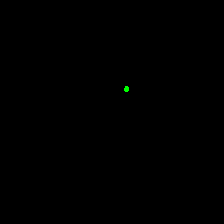

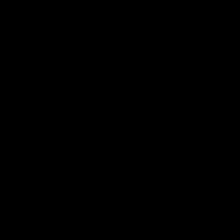

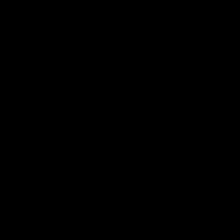

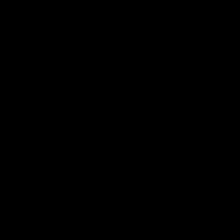

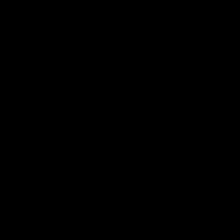

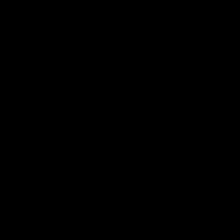

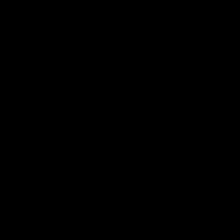

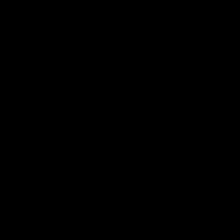

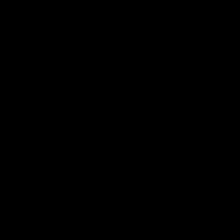

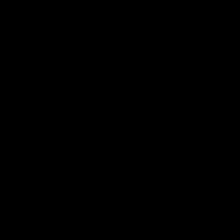

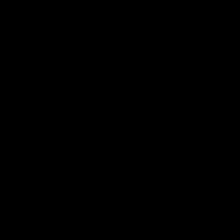

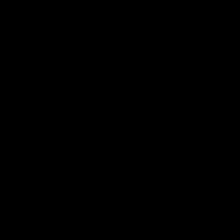

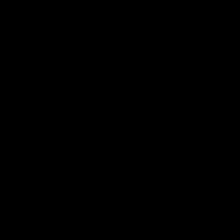

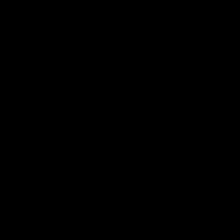

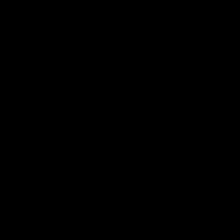

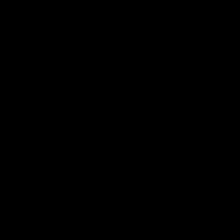

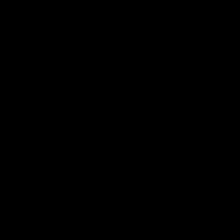

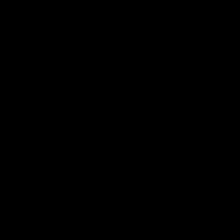

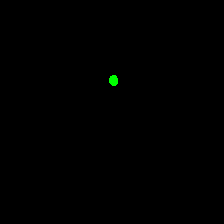

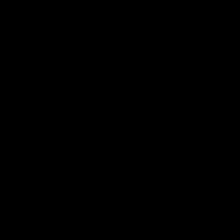

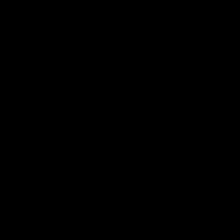

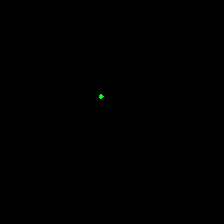

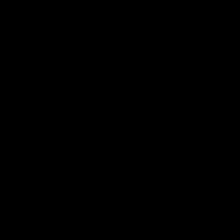

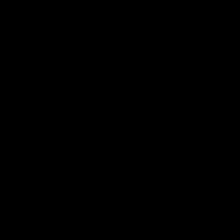

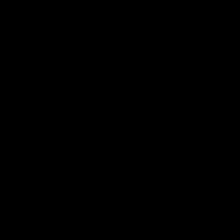

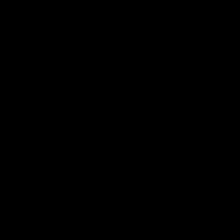

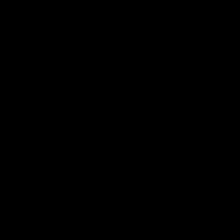

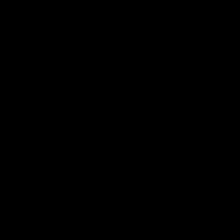

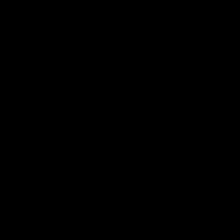

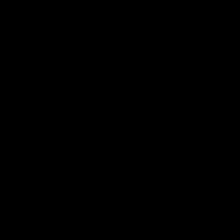

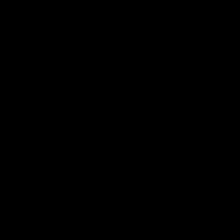

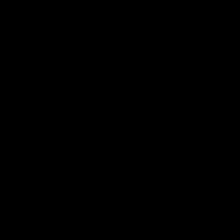

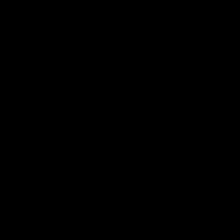

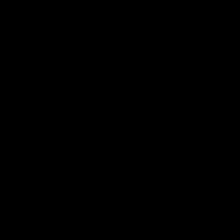

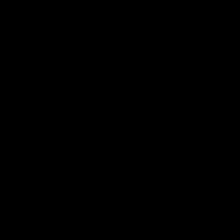

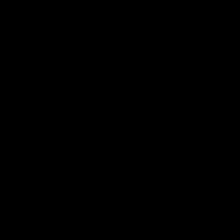

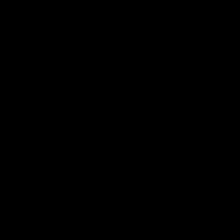

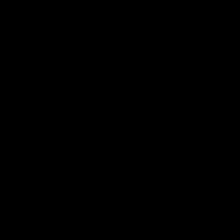

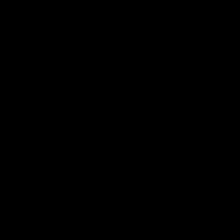

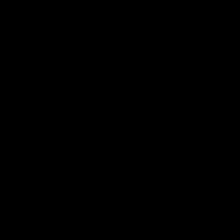

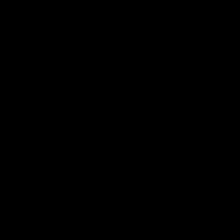

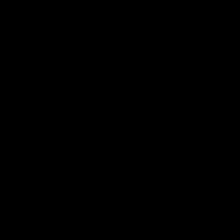

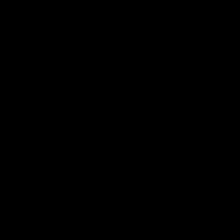

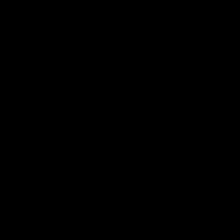

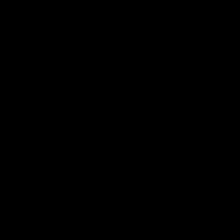

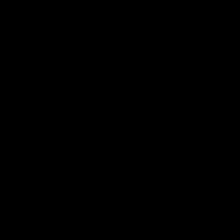

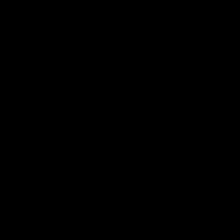

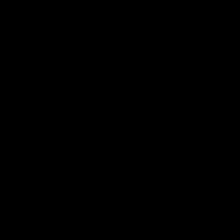

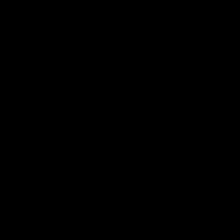

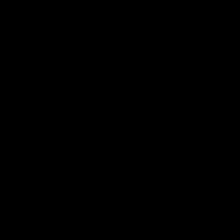

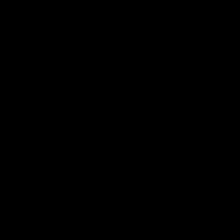

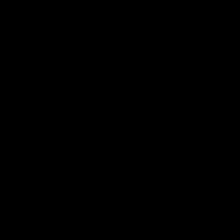

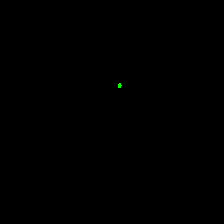

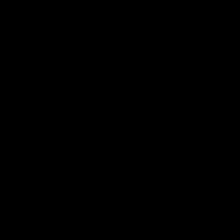

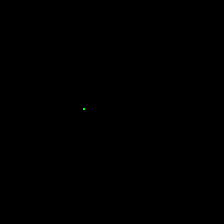

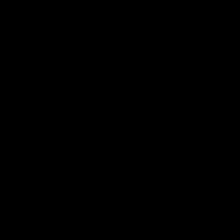

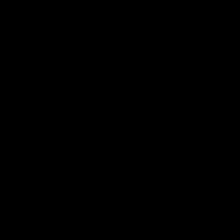

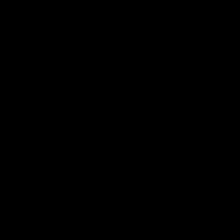

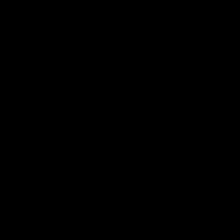

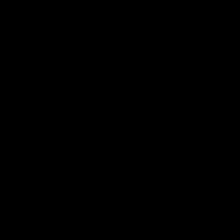

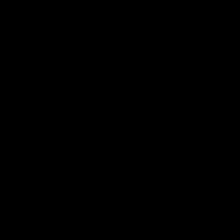

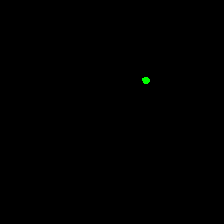

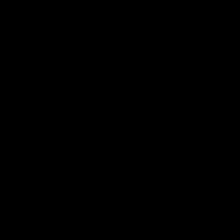

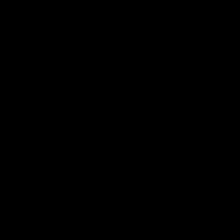

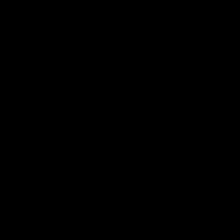

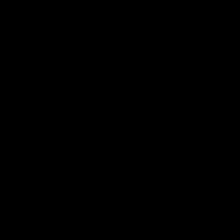

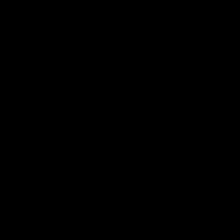

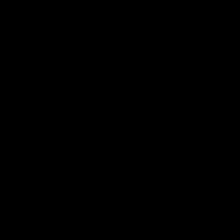

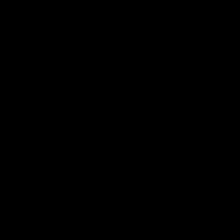

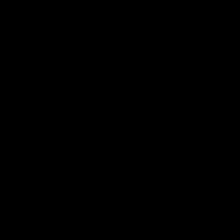

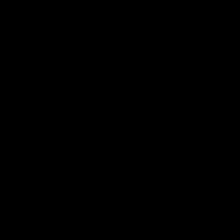

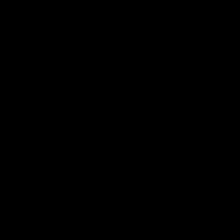

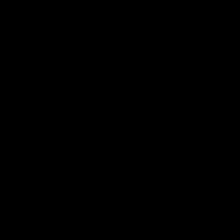

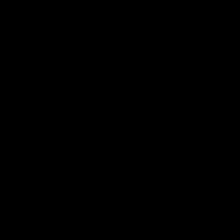

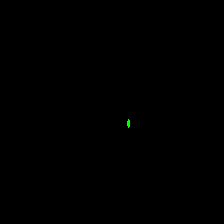

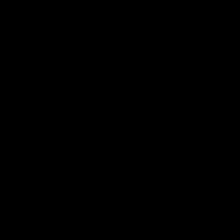

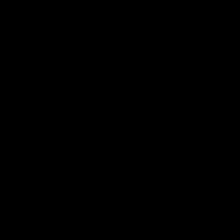

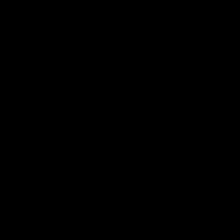

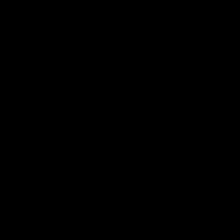

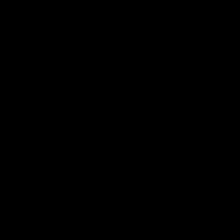

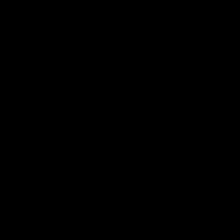

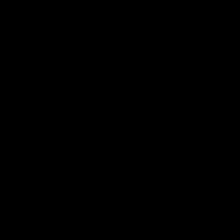

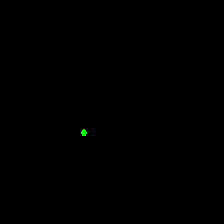

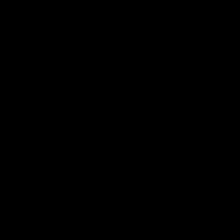

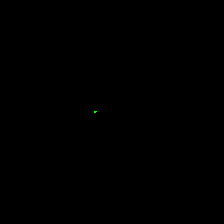

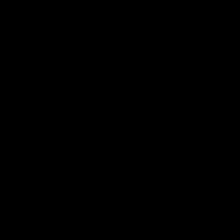

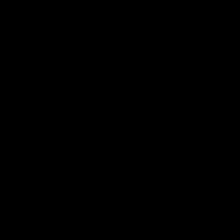

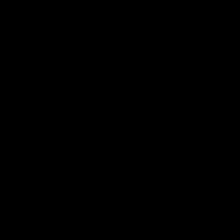

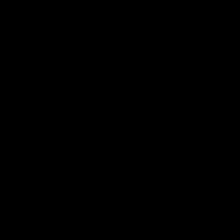

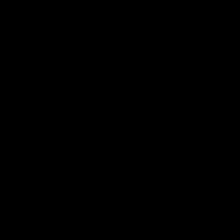

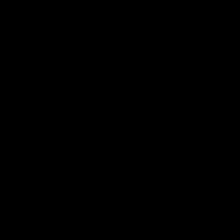

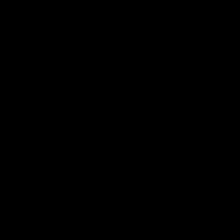

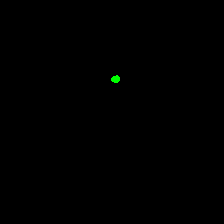

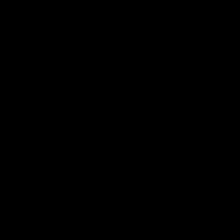

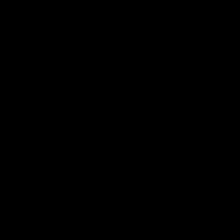

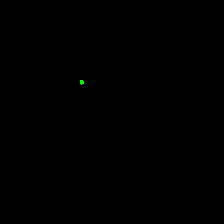

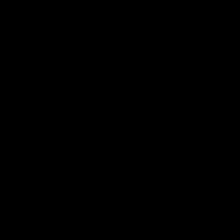

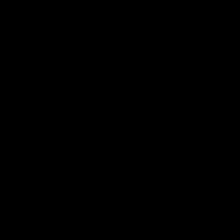

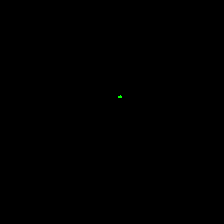

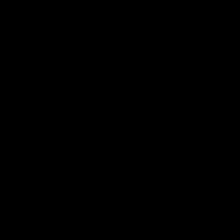

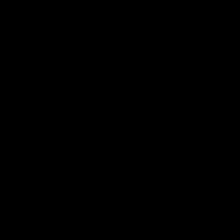

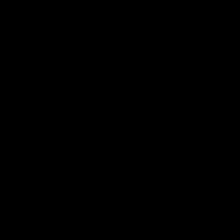

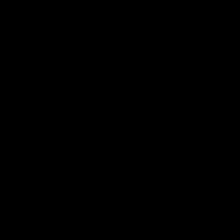

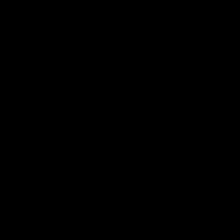

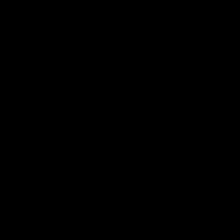

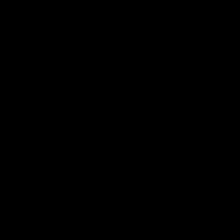

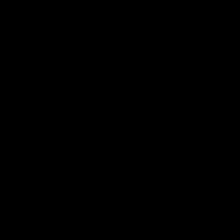

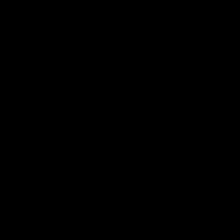

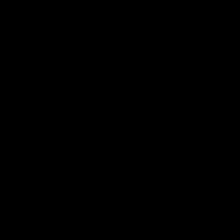

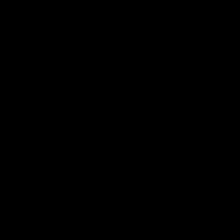

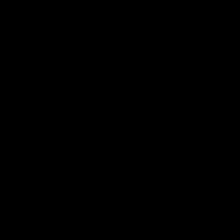

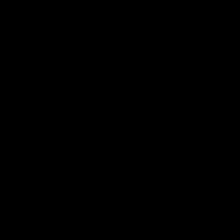

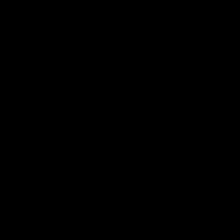

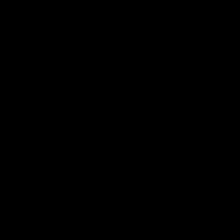

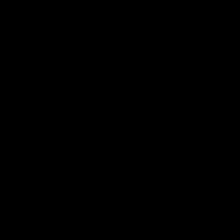

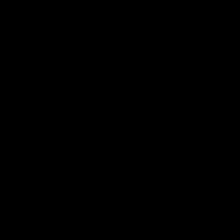

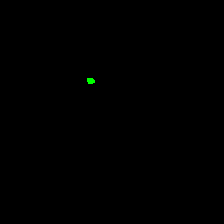

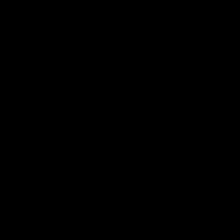

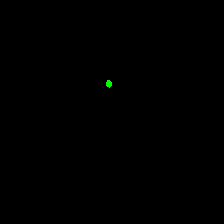

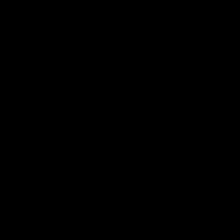

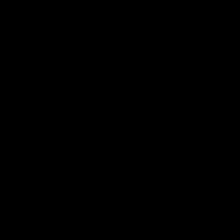

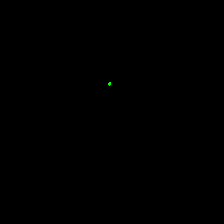

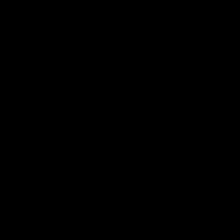

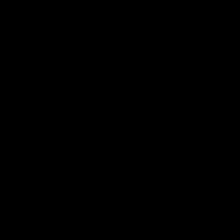

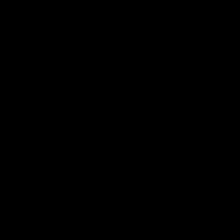

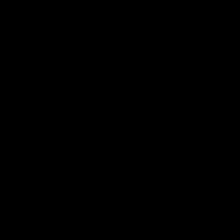

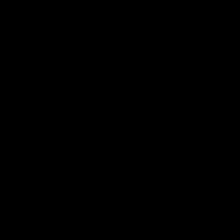

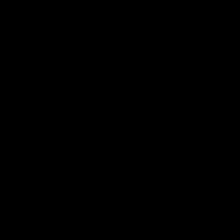

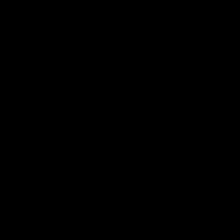

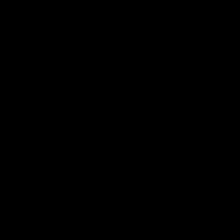

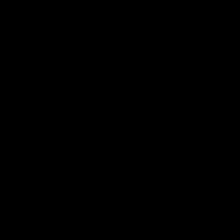

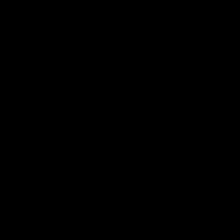

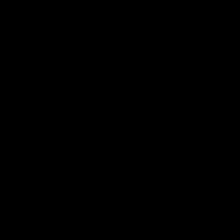

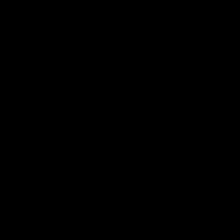

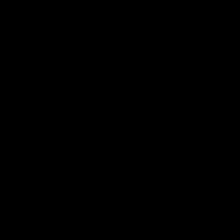

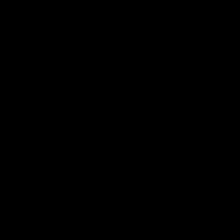

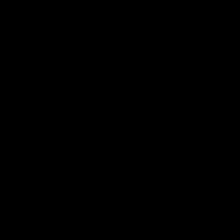

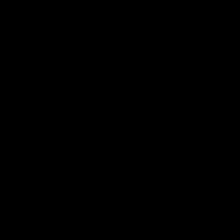

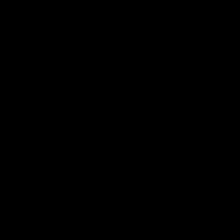

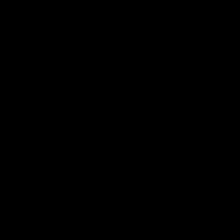

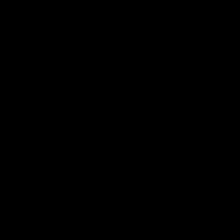

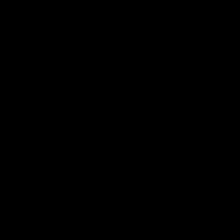

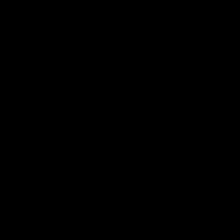

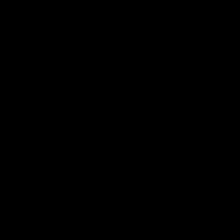

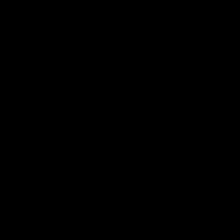

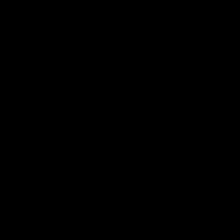

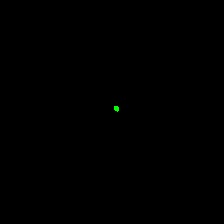

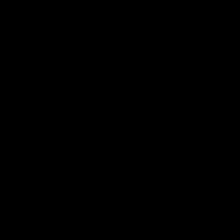

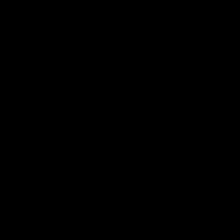

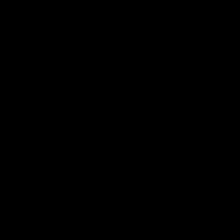

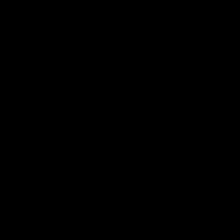

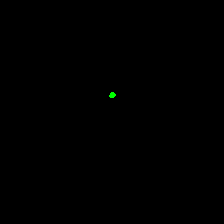

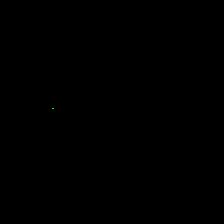

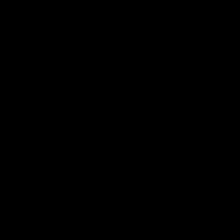

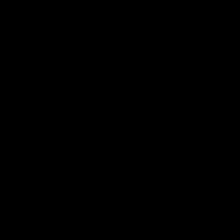

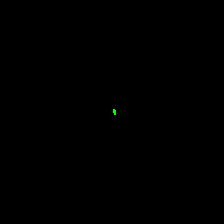

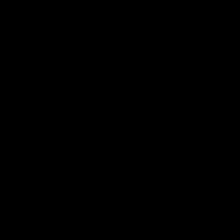

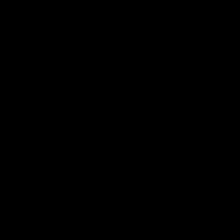

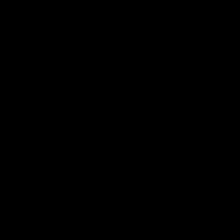

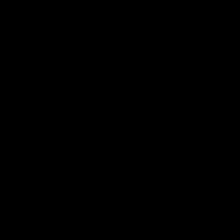

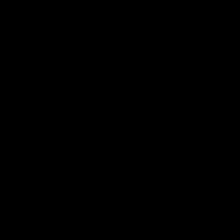

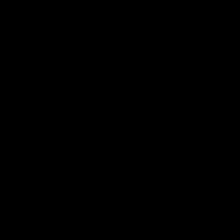

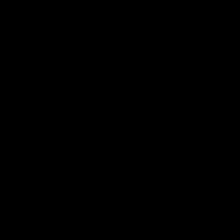

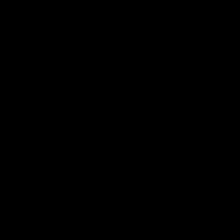

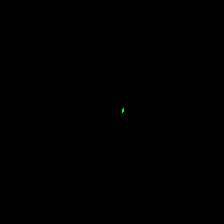

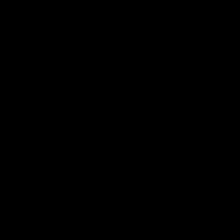

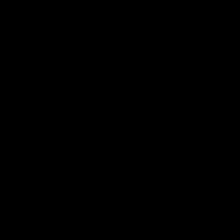

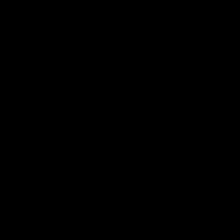

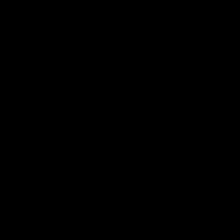

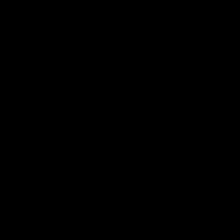

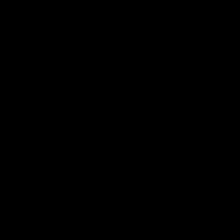

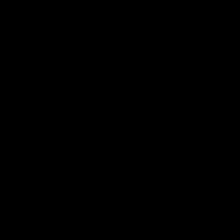

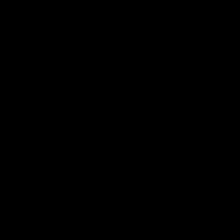

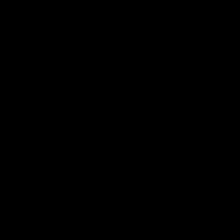

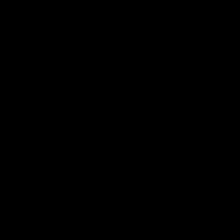

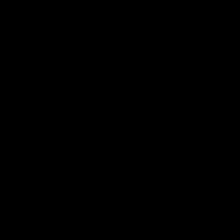

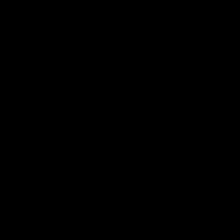

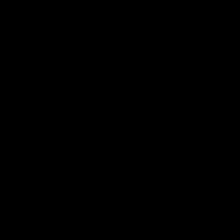

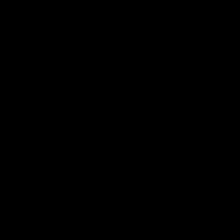

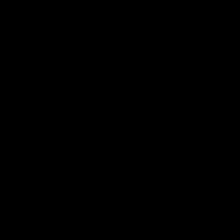

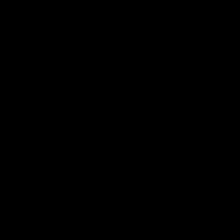

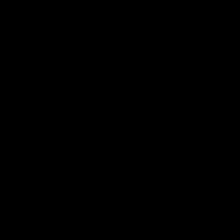

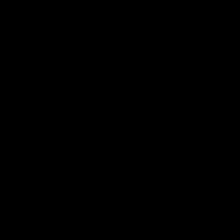

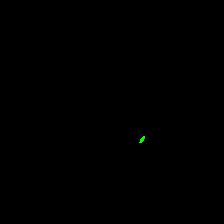

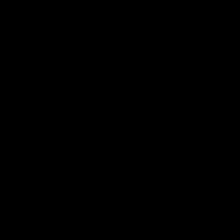

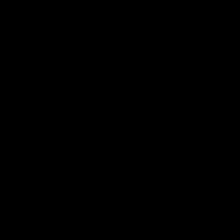

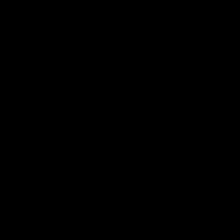

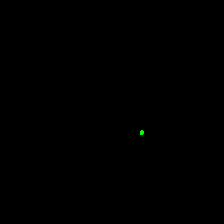

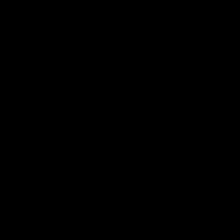

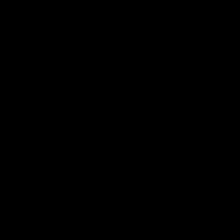

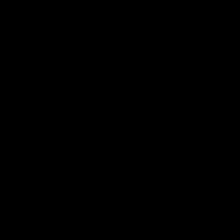

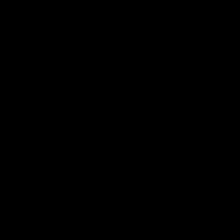

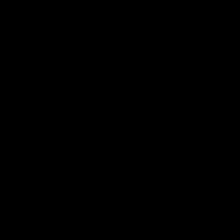

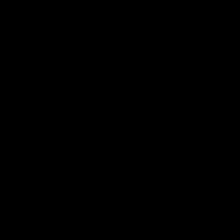

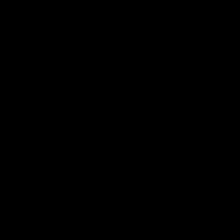

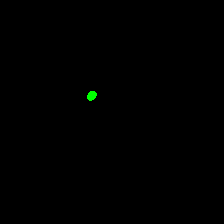

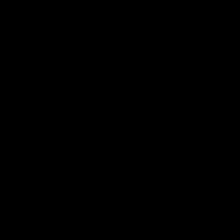

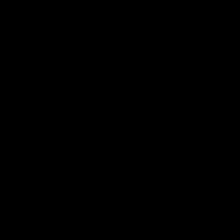

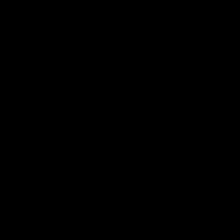

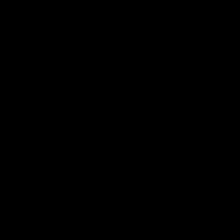

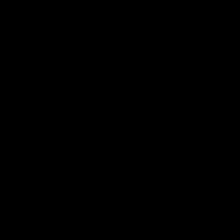

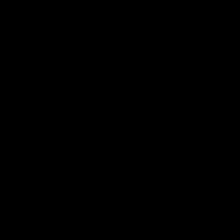

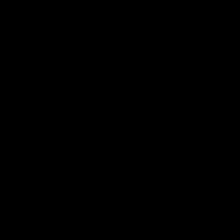

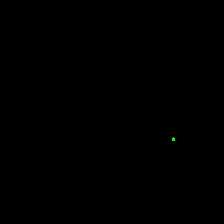

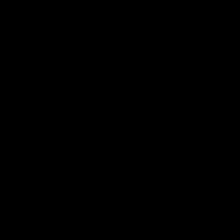

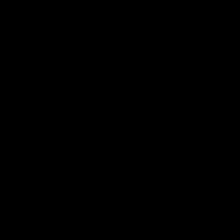

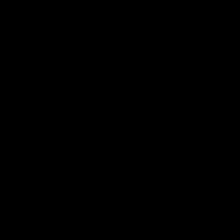

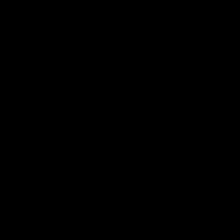

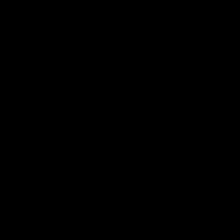

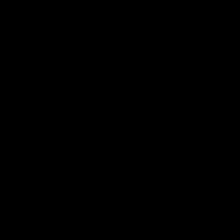

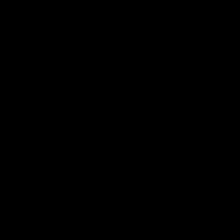

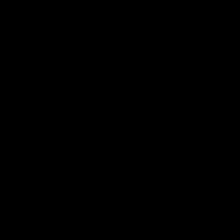

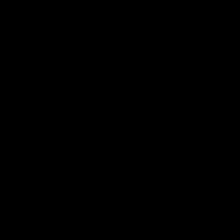

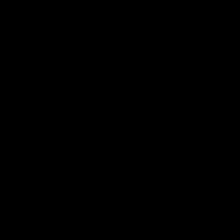

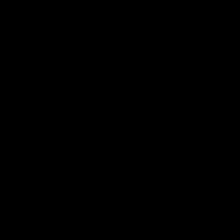

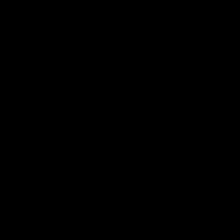

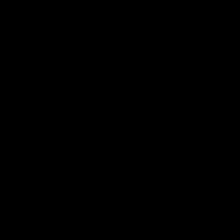

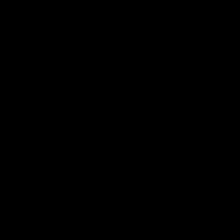

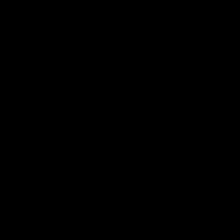

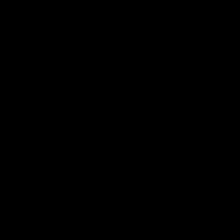

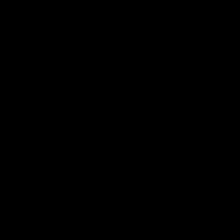

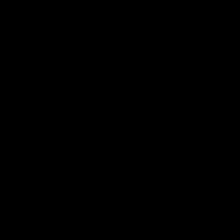

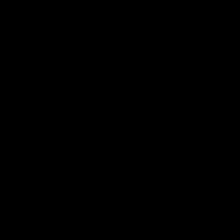

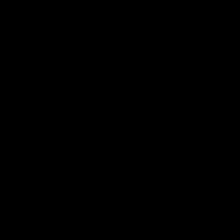

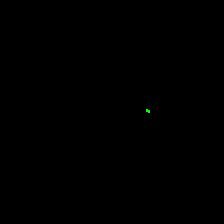

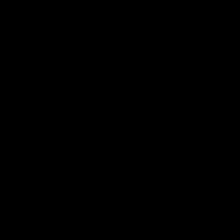

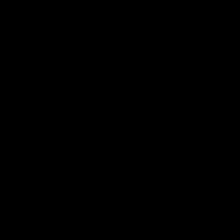

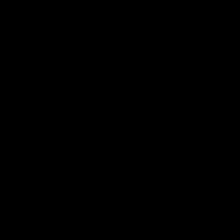

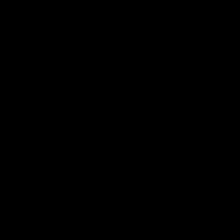

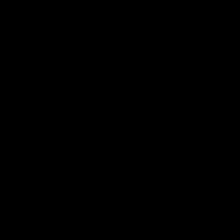

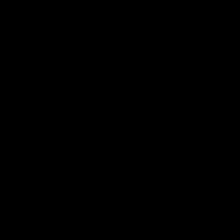

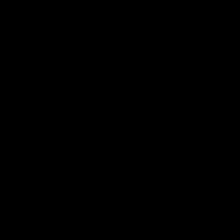

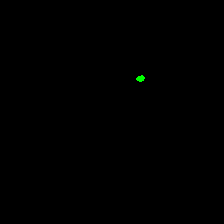

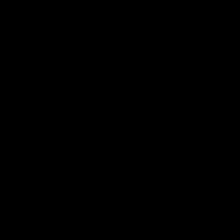

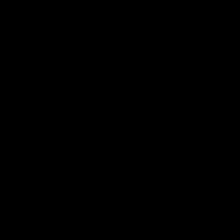

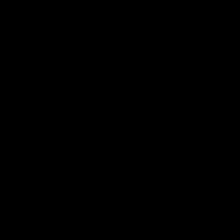

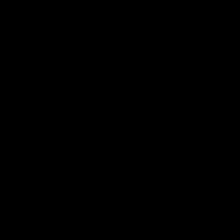

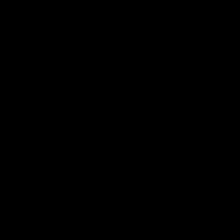

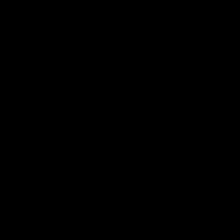

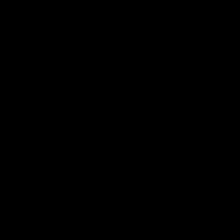

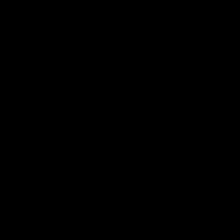

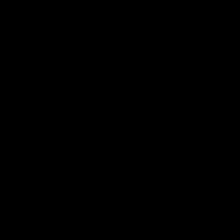

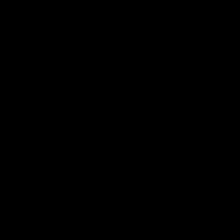

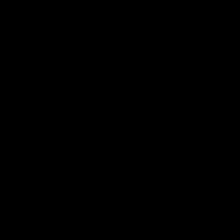

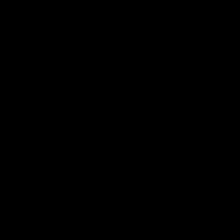

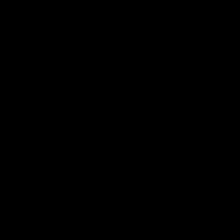

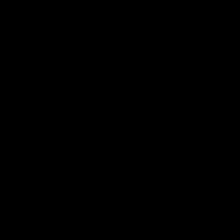

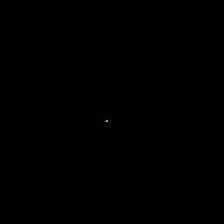

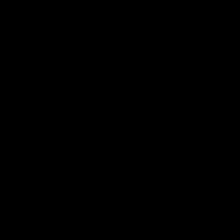

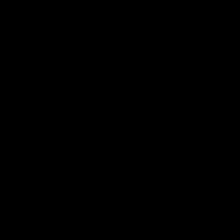

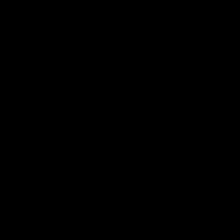

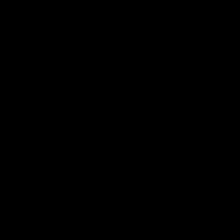

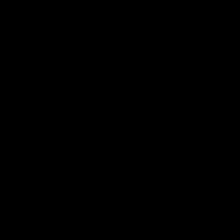

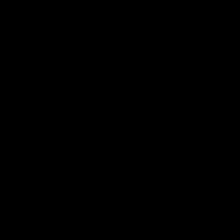

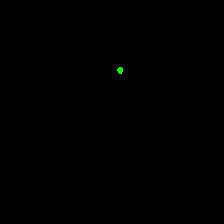

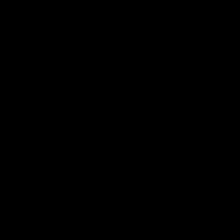

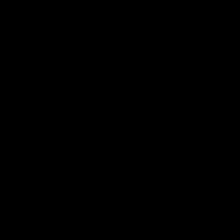

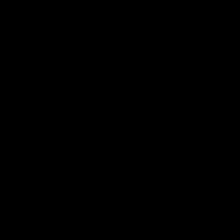

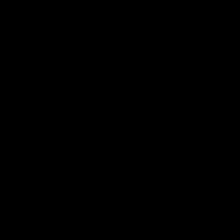

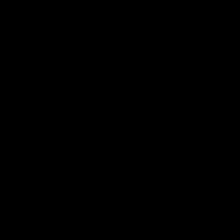

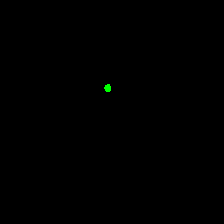

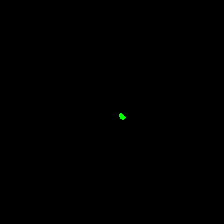

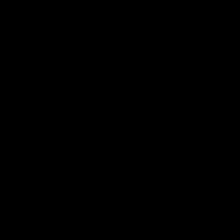

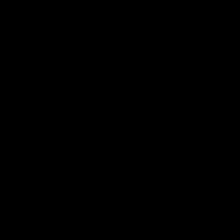

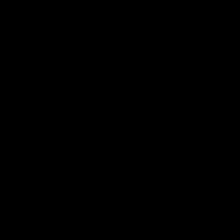

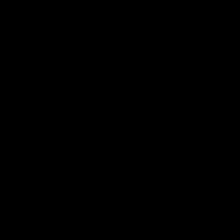

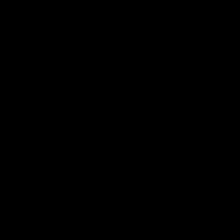

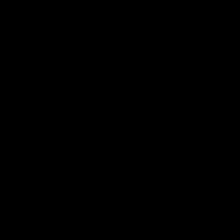

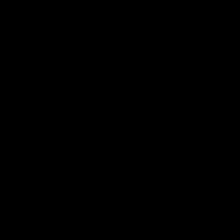

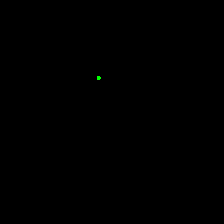

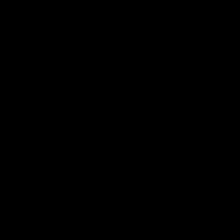

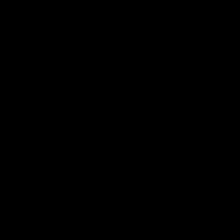

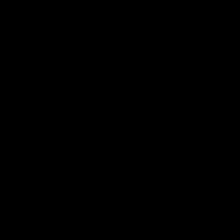

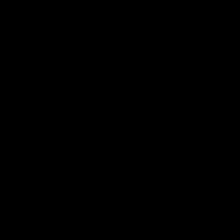

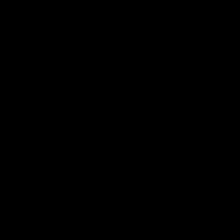

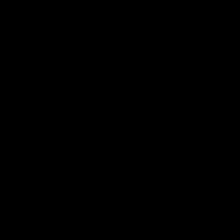

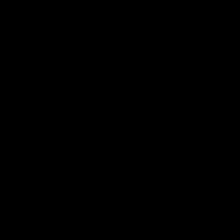

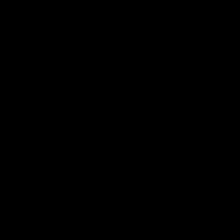

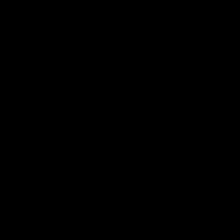

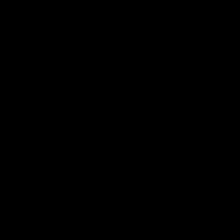

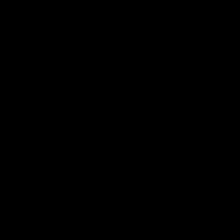

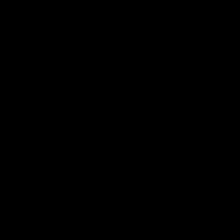

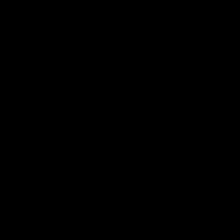

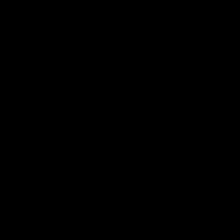

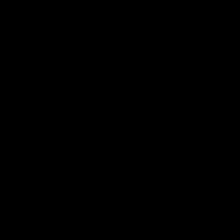

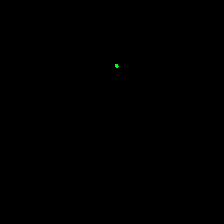

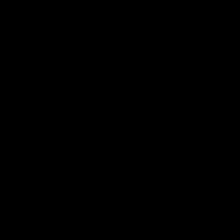

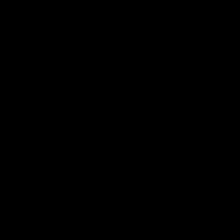

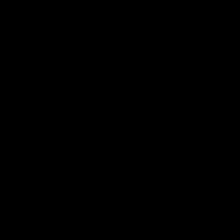

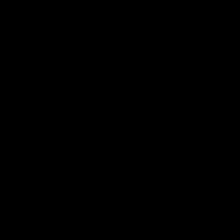

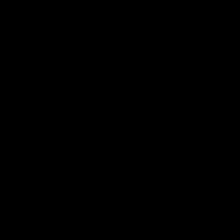

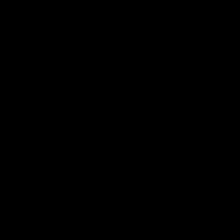

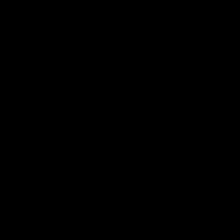

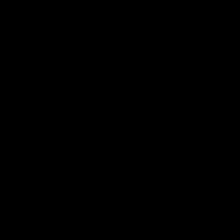

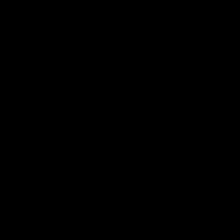

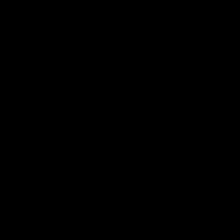

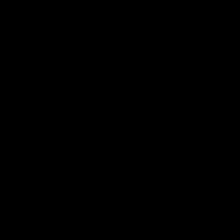

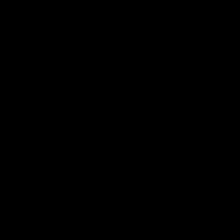

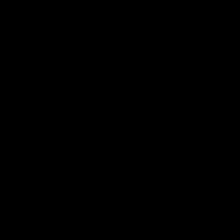

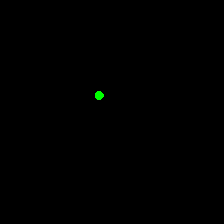

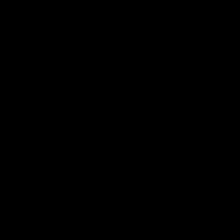

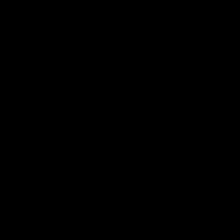

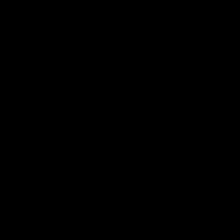

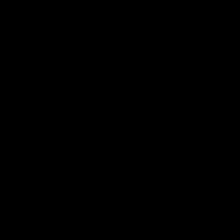

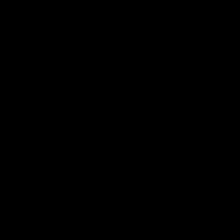

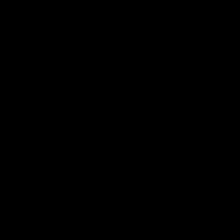

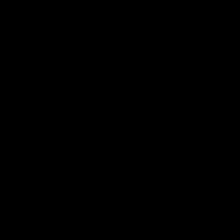

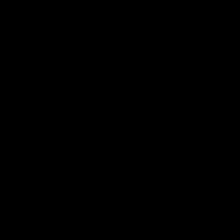

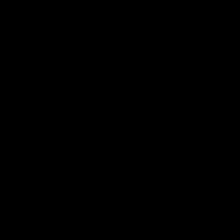

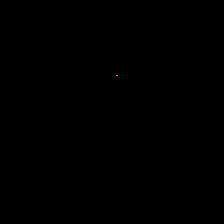

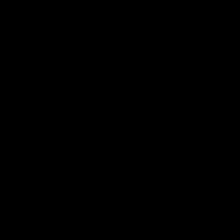

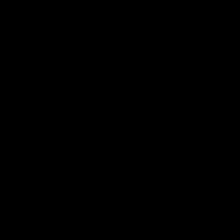

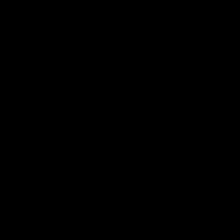

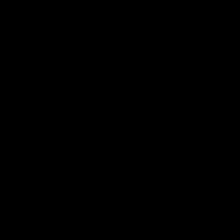

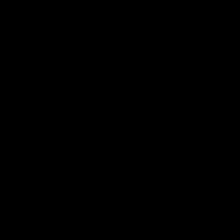

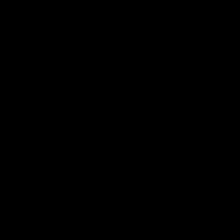

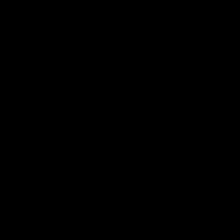

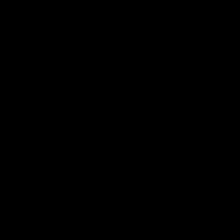

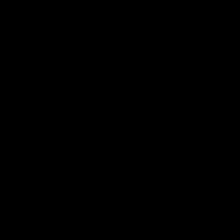

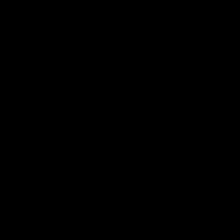

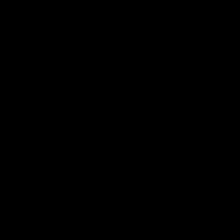

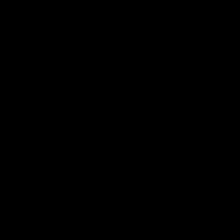

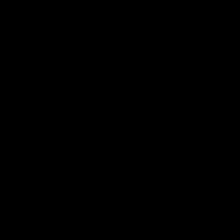

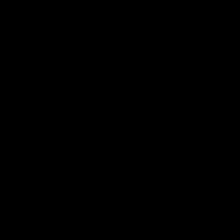

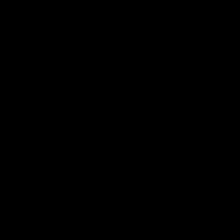

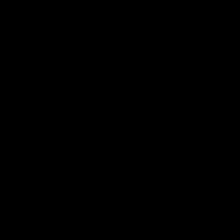

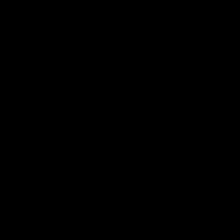

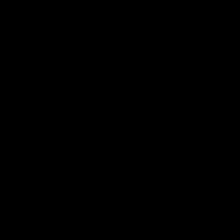

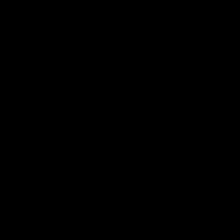

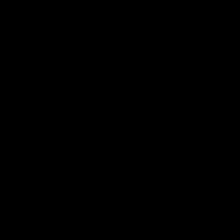

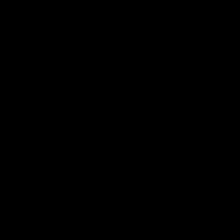

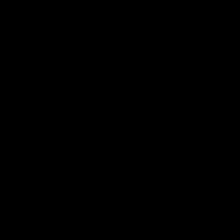

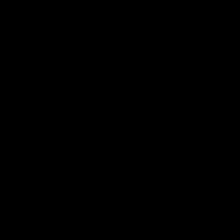

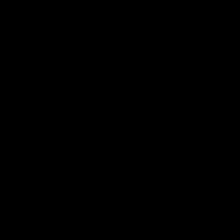

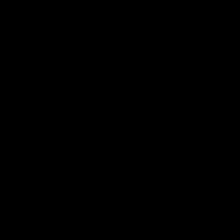

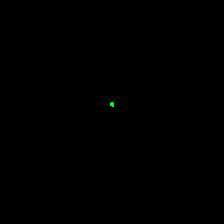

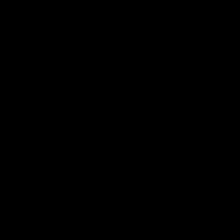

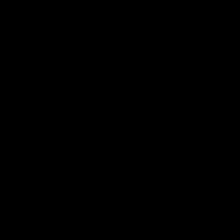

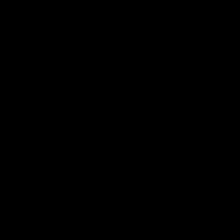

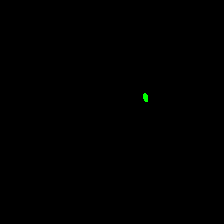

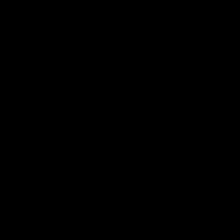

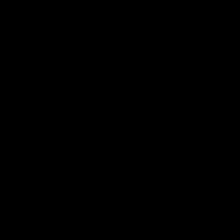

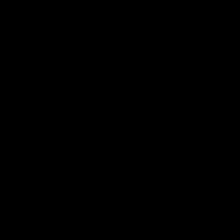

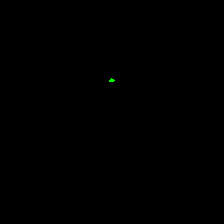

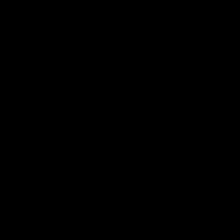

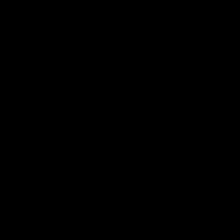

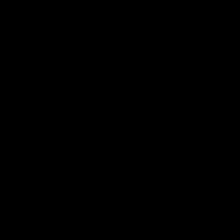

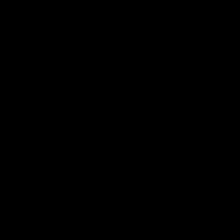

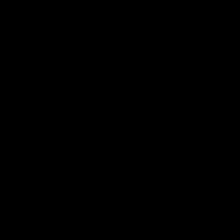

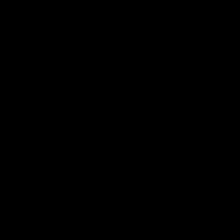

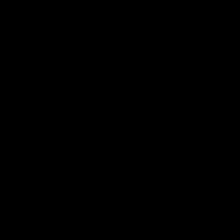

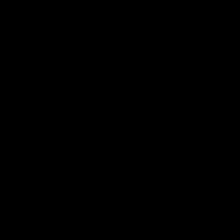

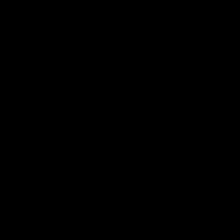

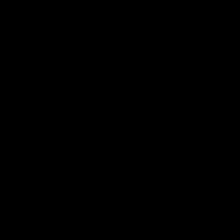

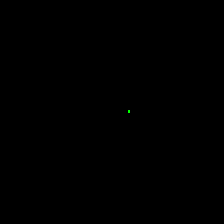

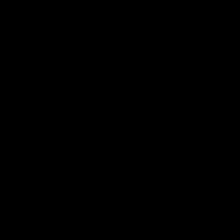

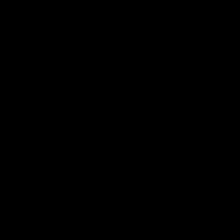

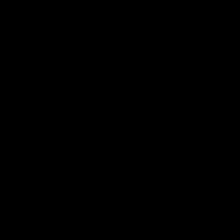

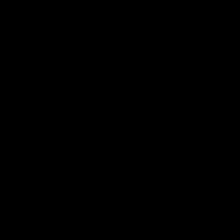

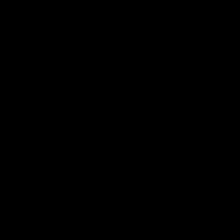

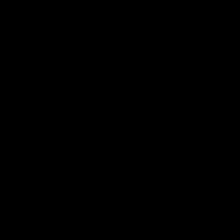

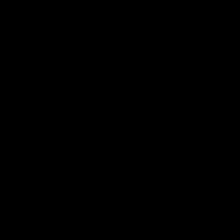

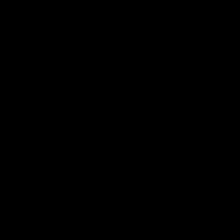

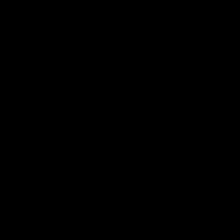

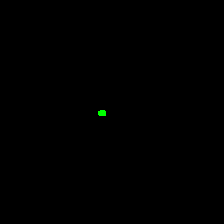

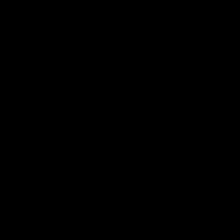

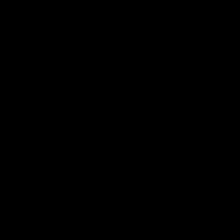

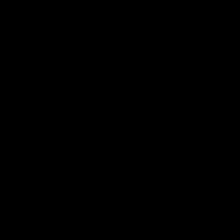

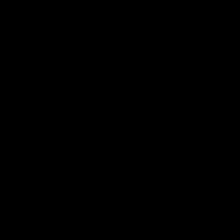

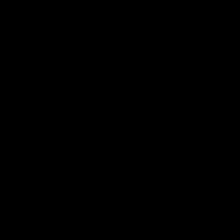

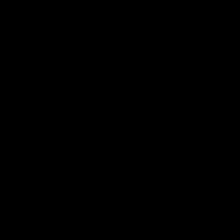

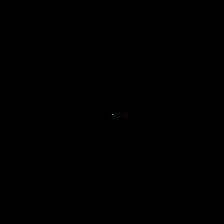

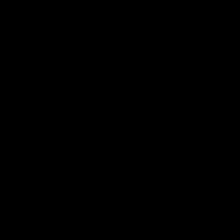

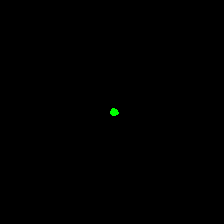

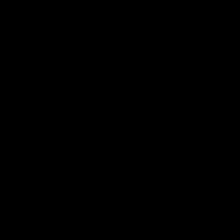

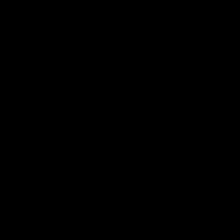

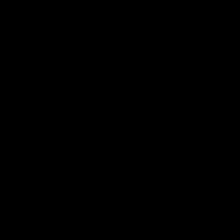

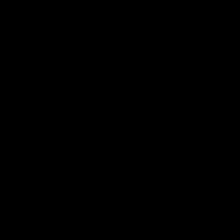

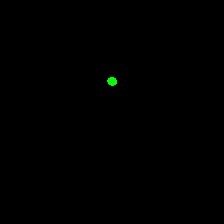

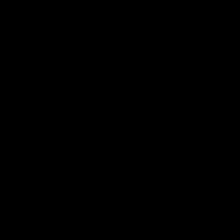

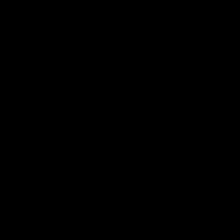

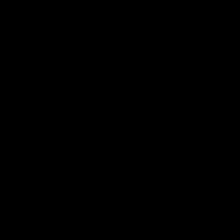

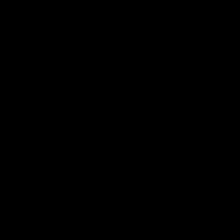

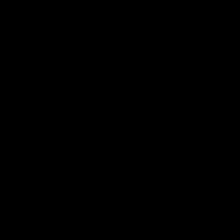

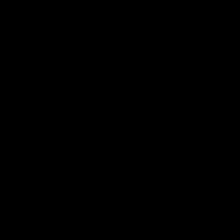

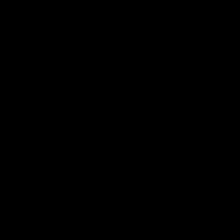

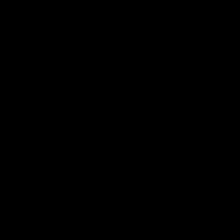

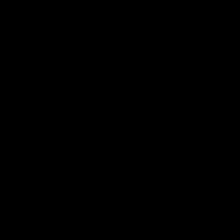

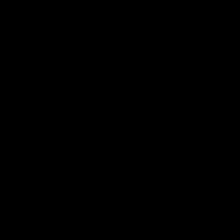

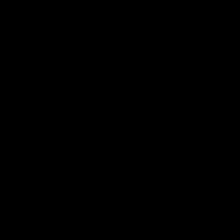

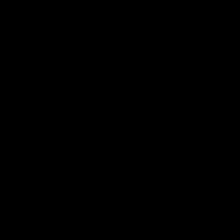

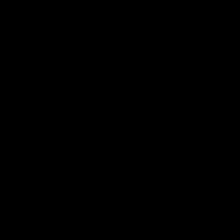

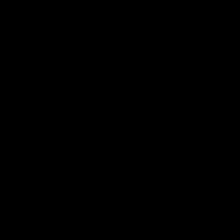

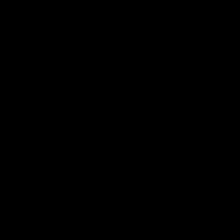

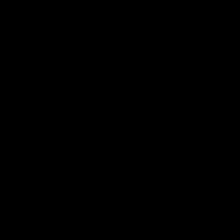

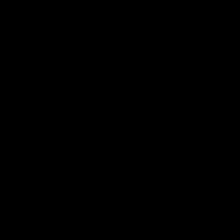

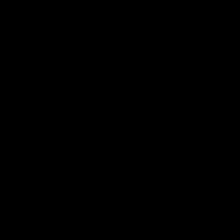

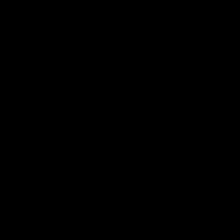

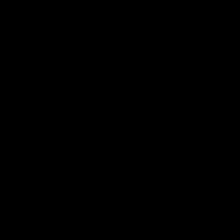

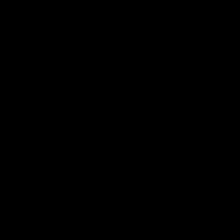

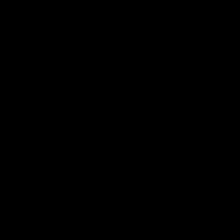

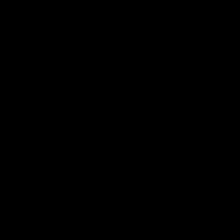

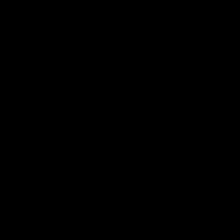

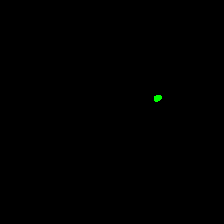

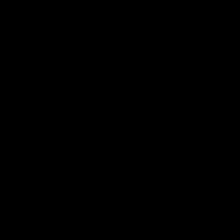

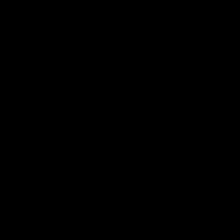

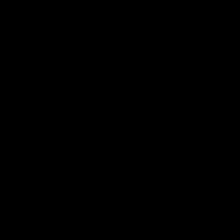

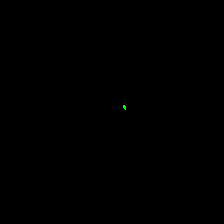

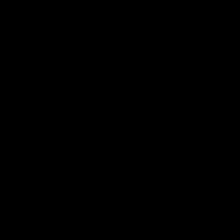

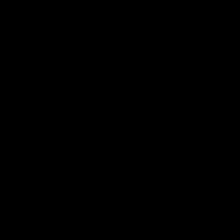

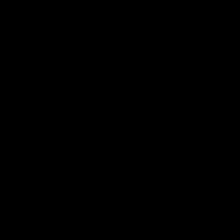

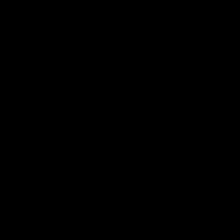

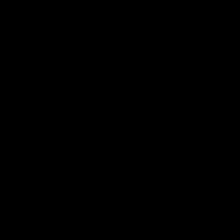

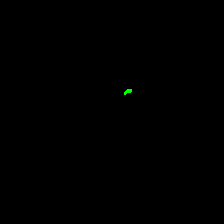

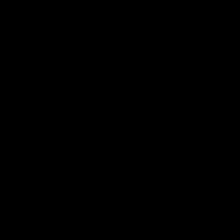

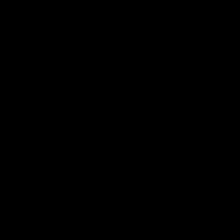

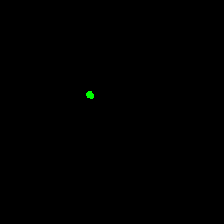

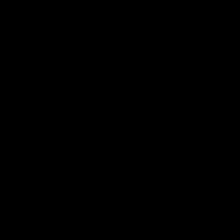

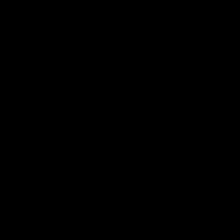

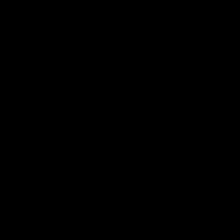

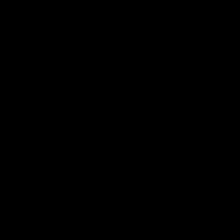

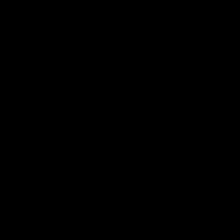

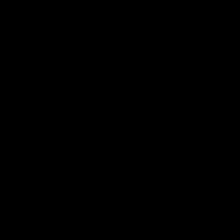

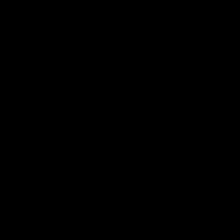

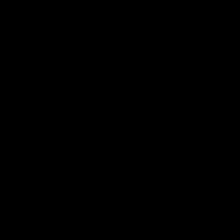

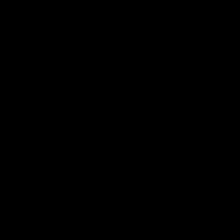

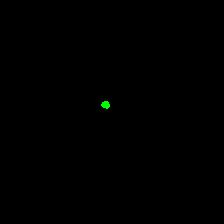

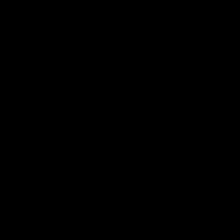

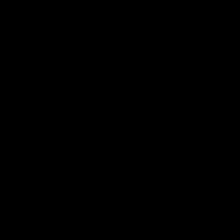

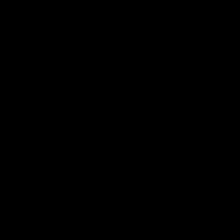

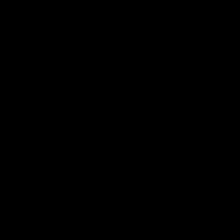

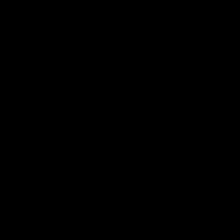

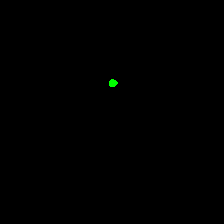

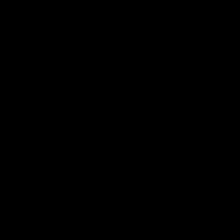

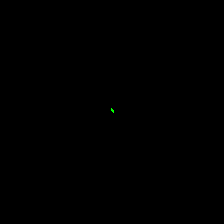

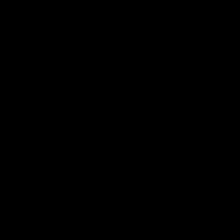

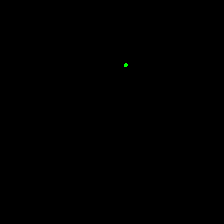

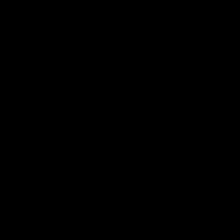

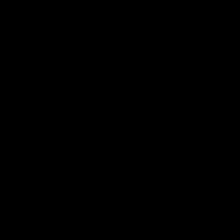

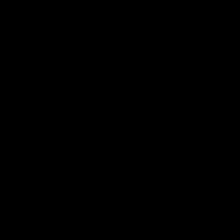

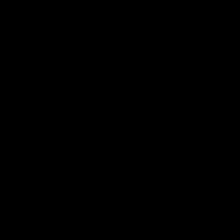

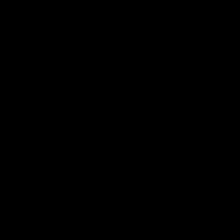

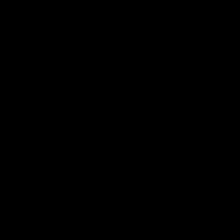

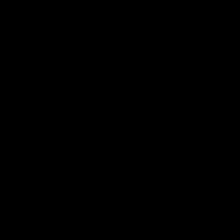

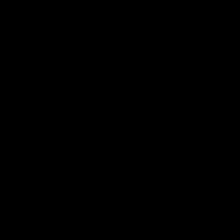

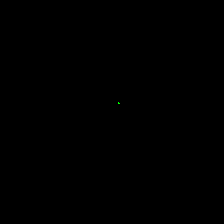

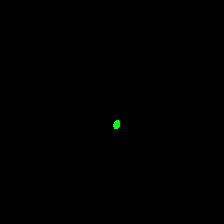

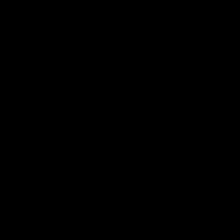

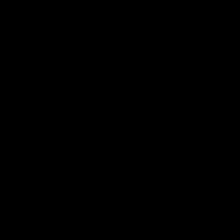

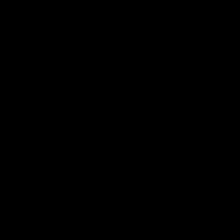

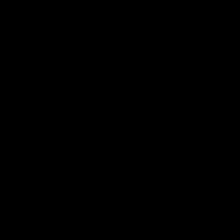

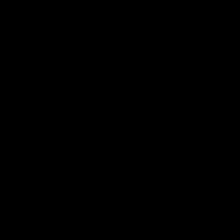

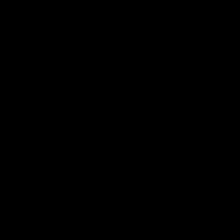

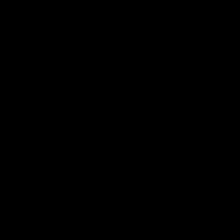

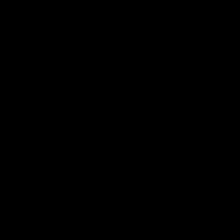

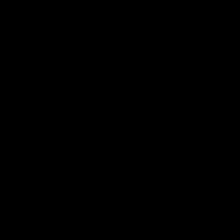

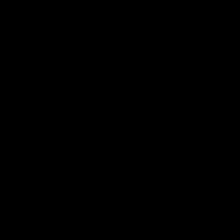

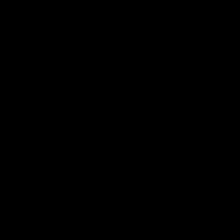

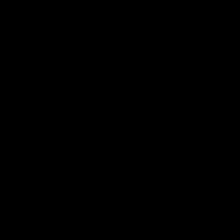

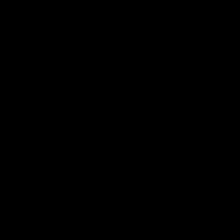

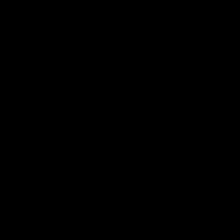

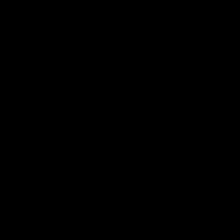

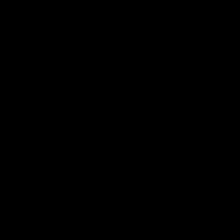

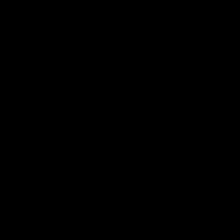

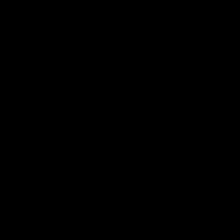

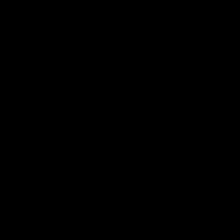

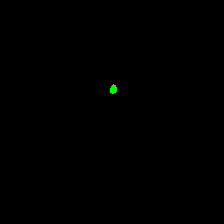

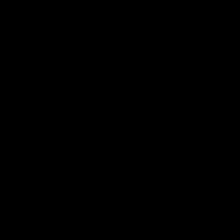

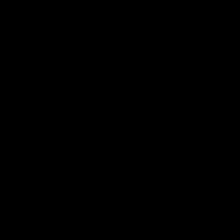

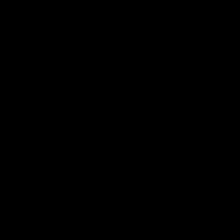

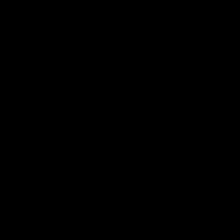

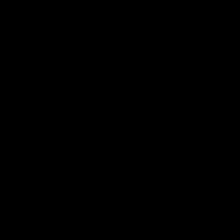

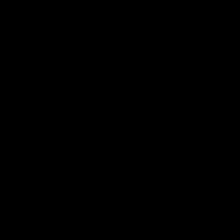

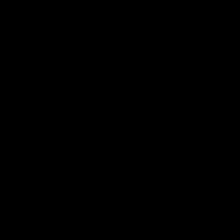

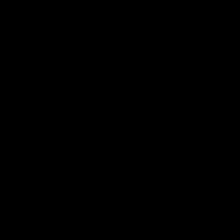

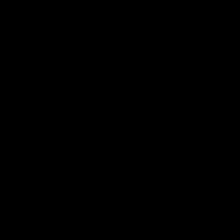

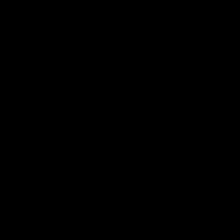

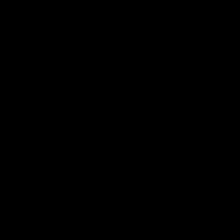

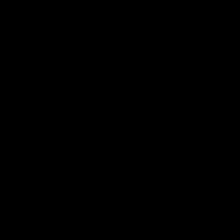

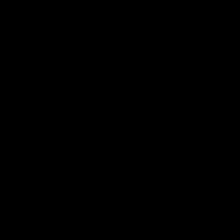

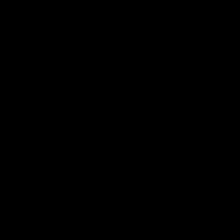

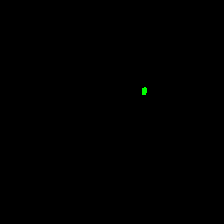

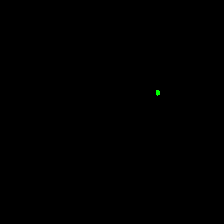

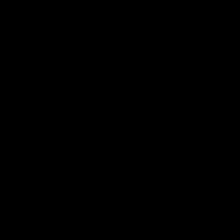

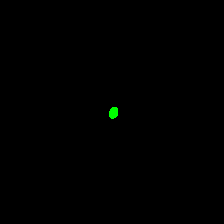

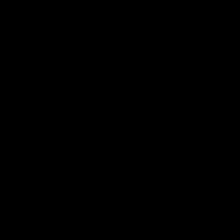

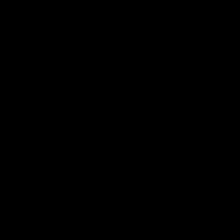

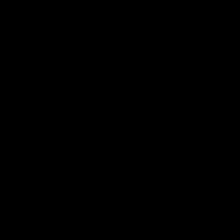

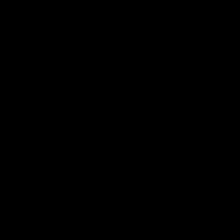

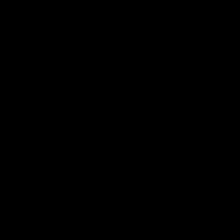

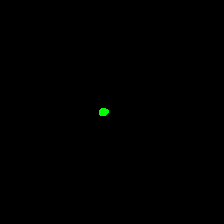

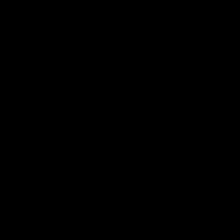

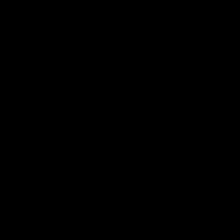

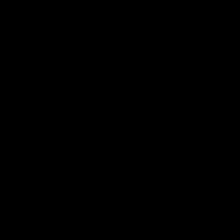

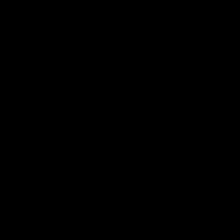

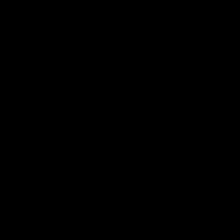

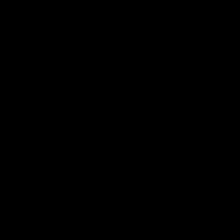

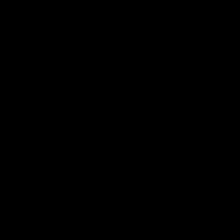

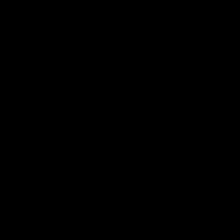

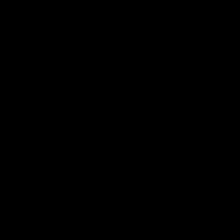

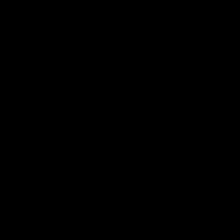

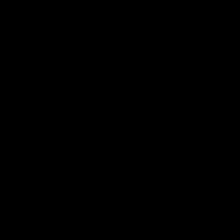

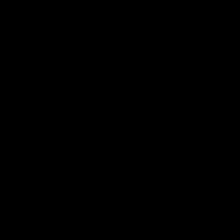

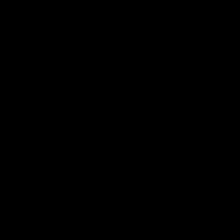

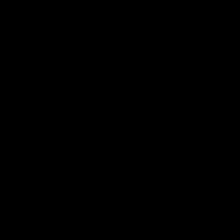

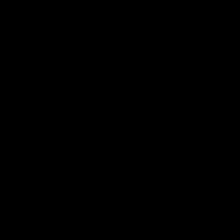

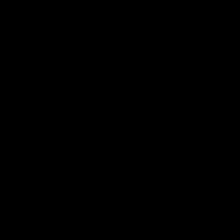

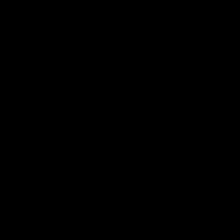

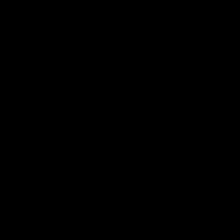

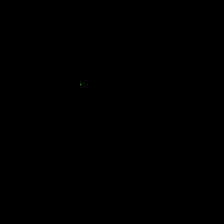

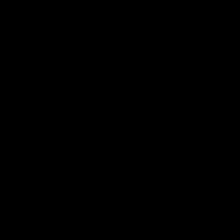

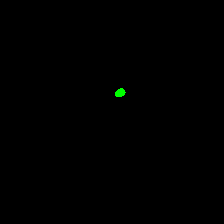

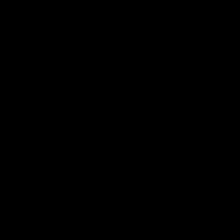

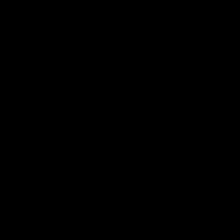

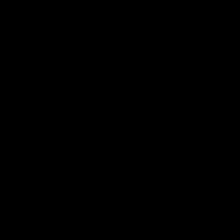

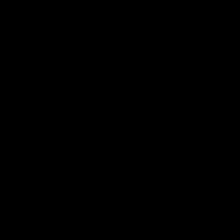

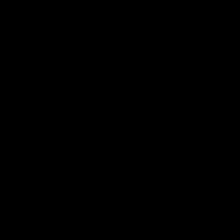

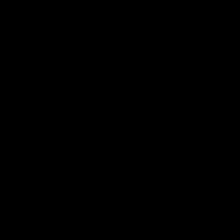

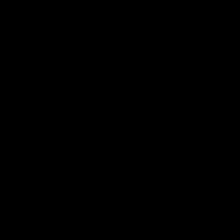

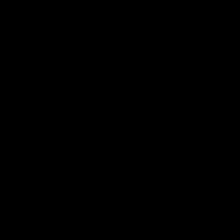

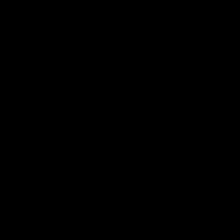

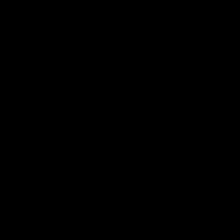

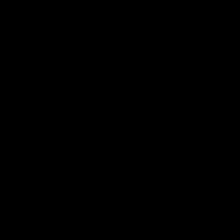

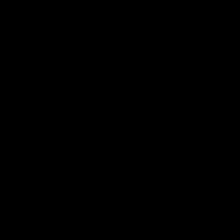

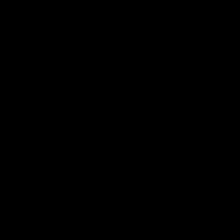

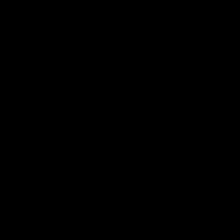

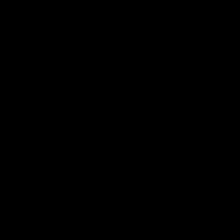

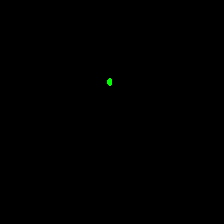

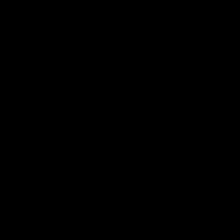

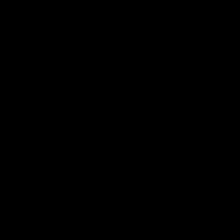

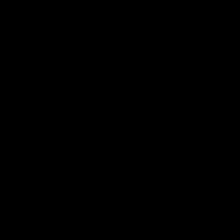

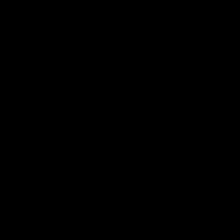

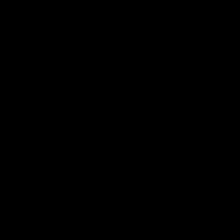

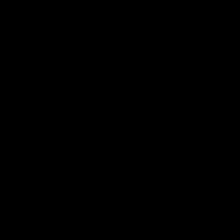

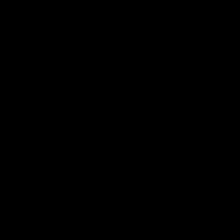

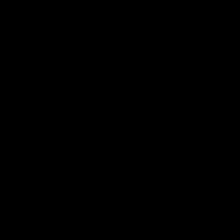

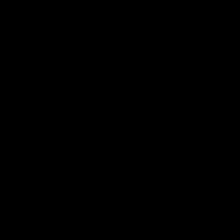

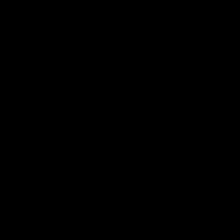

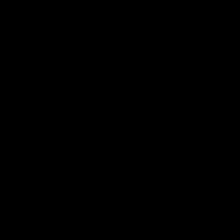

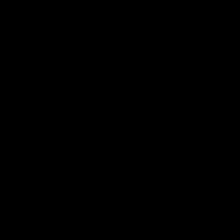

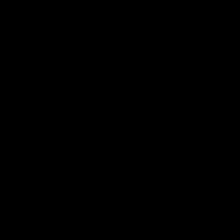

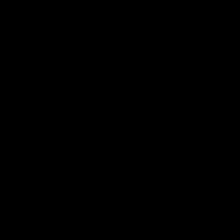

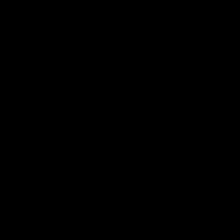

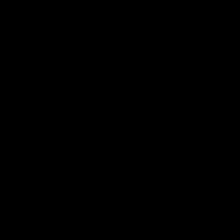

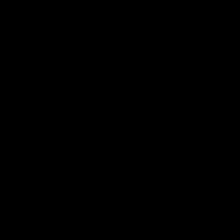

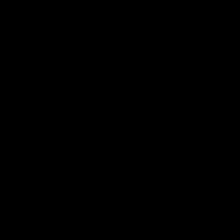

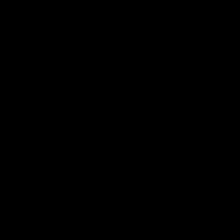

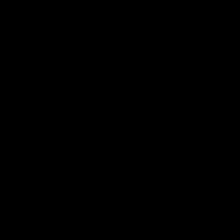

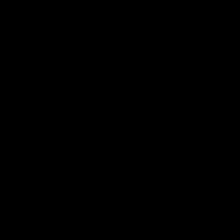

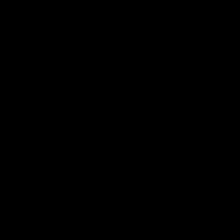

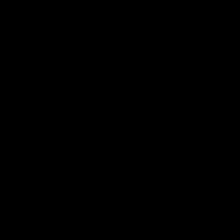

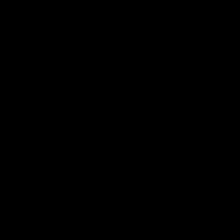

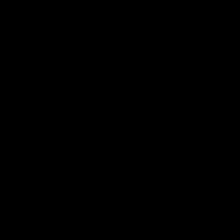

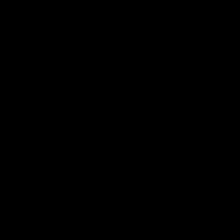

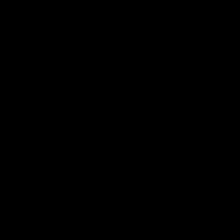

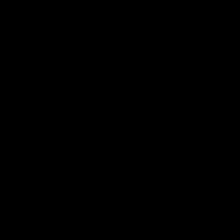

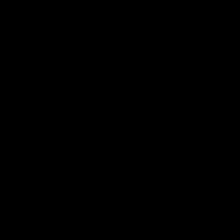

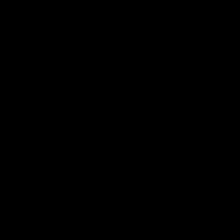

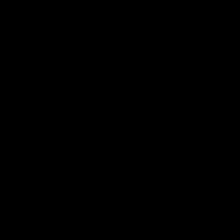

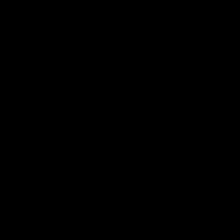

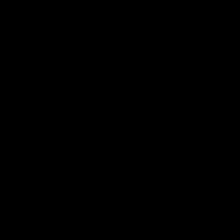

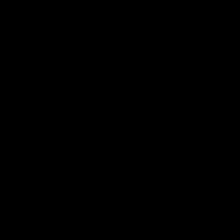

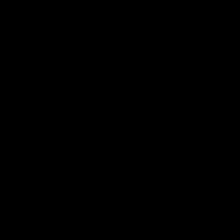

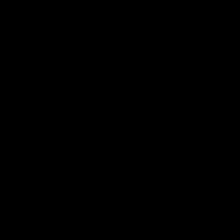

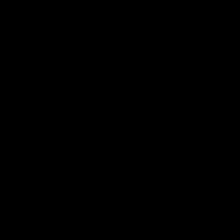

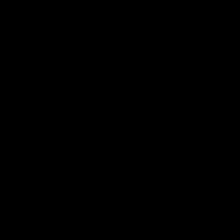

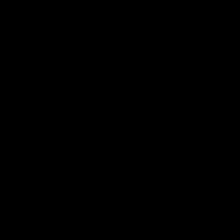

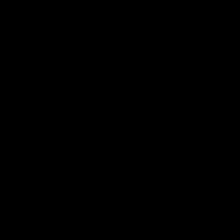

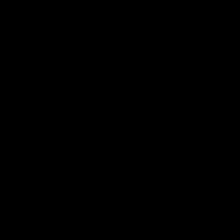

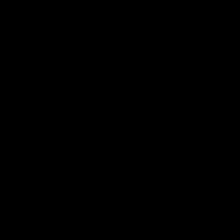

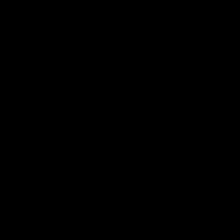

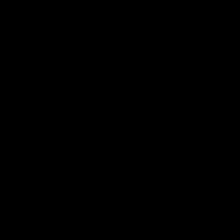

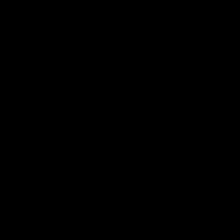

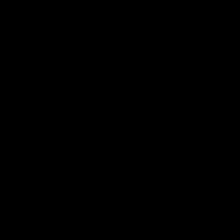

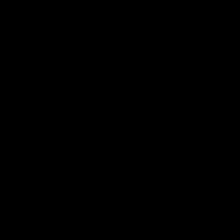

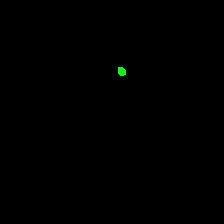

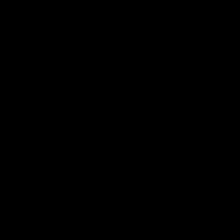

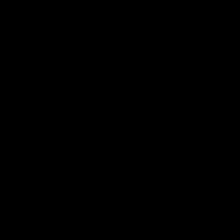

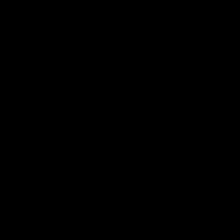

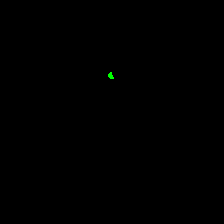

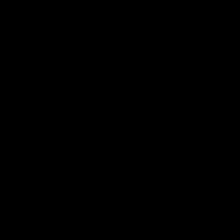

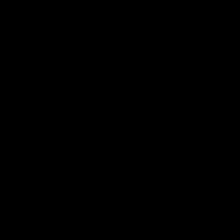

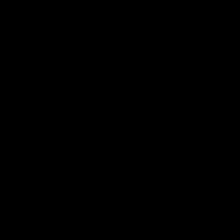

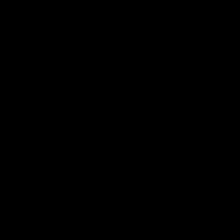

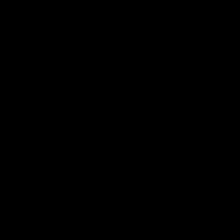

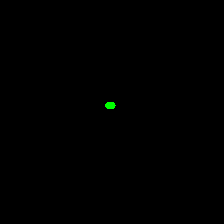

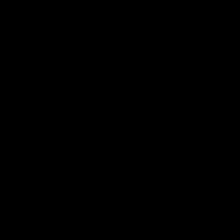

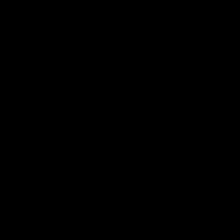

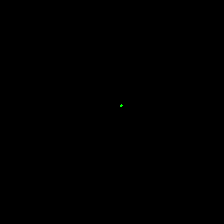

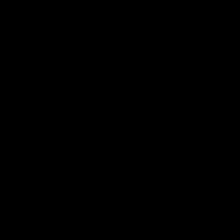

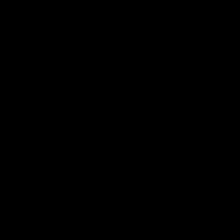

RuntimeError: ignored

In [16]:
import SimpleITK as sitk
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow

path = '/content/MSD/Dataset100_FracAtles/imagesTs'
val_names = os.listdir(path)

for i in val_names:
  if i != 'summary.json':

    # A path to a T1-weighted brain .nii image:
    t1_fn = path +'/'+ i

    # Read the .nii image containing the volume with SimpleITK:
    sitk_t1 = sitk.ReadImage(t1_fn)

    # and access the numpy array:
    t1 = sitk.GetArrayFromImage(sitk_t1)
    image = t1.transpose((2,1,0)).astype(np.float32)

    cv2_imshow(image * 255 )

In [ ]:
path = '/content/MSD/Dataset100_FracAtles/imagesTs/FRAC_0057.nii.gz'


# A path to a T1-weighted brain .nii image:

# Read the .nii image containing the volume with SimpleITK:
sitk_t1 = sitk.ReadImage(path)

# and access the numpy array:
t1 = sitk.GetArrayFromImage(sitk_t1)
image = t1.transpose((2,1,0)).astype(np.float32)

cv2_imshow(image * 255 )

In [ ]:
!tar -cvf "/content/drive/MyDrive/bayena/nn_unet_preds.tar" "/content/MSD/Dataset100_FracAtles/imagesTs"  > /dev/null   #[run this cell to create tar files]

In [23]:
len(os.listdir('/content/MSD/Dataset100_FracAtles/imagesTs'))

1520

In [26]:
train_files = os.listdir('/content/MSD/Dataset100_FracAtles/imagesTs')
label_files = os.listdir(train_label_dir)
print("train image files:",len(train_files))
print("train label files:",len(label_files))
print("Matches:",len(set(train_files).intersection(set(label_files))))

assert len(set(train_files).intersection(set(label_files))) == 1517

train image files: 1520
train label files: 1517
Matches: 1517


In [ ]:
# next is to prepare the data for training a classifier.